#-----------

In [15]:
import tensorflow as tf
#import keras_nlp
import keras
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#import lovely_tensors as lt
#from lovely_numpy import lo
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from keras.models import Sequential, Model  # Model type to be used

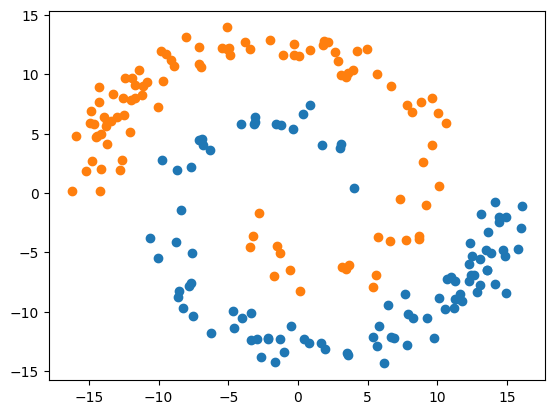

In [ ]:
N = 100
theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

r_a = 2*theta + np.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)*1.

r_b = -2*theta - np.pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)*1.

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

#np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

In [ ]:
a = np.zeros((N,2))
a[:,0] = 1
b = np.zeros((N,2))
b[:,1] = 1

In [ ]:
no_of_train = int(N*0.8)
trainset = np.vstack((x_a[:no_of_train],x_b[:no_of_train]))
trainlabel = np.vstack((a[:no_of_train],b[:no_of_train]))
testset = np.vstack((x_a[no_of_train:],x_b[no_of_train:]))
testlabel = np.vstack((a[no_of_train:],b[no_of_train:]))

In [ ]:
from copy import deepcopy

In [ ]:
trainlabel_=deepcopy(trainlabel)
trainlabel_[trainlabel_[:,0]==0]=0
trainlabel_[trainlabel_[:,0]==1]=1
trainlabel_ = trainlabel_[:,0]

In [ ]:
testlabel_=deepcopy(testlabel)
testlabel_[testlabel_[:,0]==0]=0
testlabel_[testlabel_[:,0]==1]=1
testlabel_ = testlabel_[:,0]

In [ ]:
MyModel = tf.keras.Sequential()
MyModel.add(tf.keras.layers.Dense(45))
MyModel.add(tf.keras.layers.ReLU())
MyModel.add(tf.keras.layers.Dense(45))
MyModel.add(tf.keras.layers.ReLU())
MyModel.add(tf.keras.layers.Dense(2))
MyModel.add(tf.keras.layers.Softmax())
MyModel.compile( optimizer=tf.keras.optimizers.Adam() , loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[ tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50,restore_best_weights=True) #
history = MyModel.fit(trainset,trainlabel,epochs=3000,validation_data=(testset,testlabel),callbacks=[callback],verbose=True)

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 14ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0580 - val_categorical_accuracy: 0.9750
Epoch 502/3000
5/5 [==============================] - 0s 14ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_categorical_accuracy: 0.9750
Epoch 503/3000
5/5 [==============================] - 0s 13ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0574 - val_categorical_accuracy: 0.9750
Epoch 504/3000
5/5 [==============================] - 0s 8ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0579 - val_categorical_accuracy: 0.9750
Epoch 505/3000
5/5 [==============================] - 0s 14ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0580 - val_categorical_accuracy: 0.9750
Epoch 506/3000
5/5 [==============================] - 0s 10ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.057

In [ ]:
MyModel = tf.keras.Sequential()
MyModel.add(tf.keras.layers.Dense(45, kernel_regularizer = tf.keras.regularizers.L2(0.01)))
MyModel.add(tf.keras.layers.ReLU())
MyModel.add(tf.keras.layers.Dense(45,  kernel_regularizer=tf.keras.regularizers.L2(0.01)))
MyModel.add(tf.keras.layers.ReLU())
MyModel.add(tf.keras.layers.Dense(2))
MyModel.add(tf.keras.layers.Softmax())
MyModel.compile( optimizer=tf.keras.optimizers.Adam() , loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[ tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50,restore_best_weights=True) #
history = MyModel.fit(trainset,trainlabel,epochs=300,validation_data=(testset,testlabel),callbacks=[callback],verbose=True)

Epoch 1/300
5/5 [==============================] - 1s 66ms/step - loss: 1.0392 - categorical_accuracy: 0.6687 - val_loss: 0.8812 - val_categorical_accuracy: 0.7750
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 0.9344 - categorical_accuracy: 0.7750 - val_loss: 0.8071 - val_categorical_accuracy: 0.8500
Epoch 3/300
5/5 [==============================] - 0s 11ms/step - loss: 0.8980 - categorical_accuracy: 0.7812 - val_loss: 0.7863 - val_categorical_accuracy: 0.8500
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.8772 - categorical_accuracy: 0.7812 - val_loss: 0.7705 - val_categorical_accuracy: 0.8500
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.8571 - categorical_accuracy: 0.7750 - val_loss: 0.7576 - val_categorical_accuracy: 0.8500
Epoch 6/300
5/5 [==============================] - 0s 11ms/step - loss: 0.8377 - categorical_accuracy: 0.7812 - val_loss: 0.7441 - val_categorical_accuracy: 0.8500
Epoch 7/300
5/5 

In [ ]:
AllModels = [MyModel] #AllModels = [MyModel,MyModel1,MyModel2,MyModel3]

In [ ]:
top = cm.get_cmap('Blues', 128)
bottom = cm.get_cmap('Reds', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128)),
                       bottom(np.linspace(0, 1, 128))))
RedBlue = ListedColormap(newcolors, name='RedBlue')

<ipython-input-124-10f541a1f9fb>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top = cm.get_cmap('Blues', 128)
<ipython-input-124-10f541a1f9fb>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bottom = cm.get_cmap('Reds', 128)


7844/7844 [==============================] - 11s 1ms/step


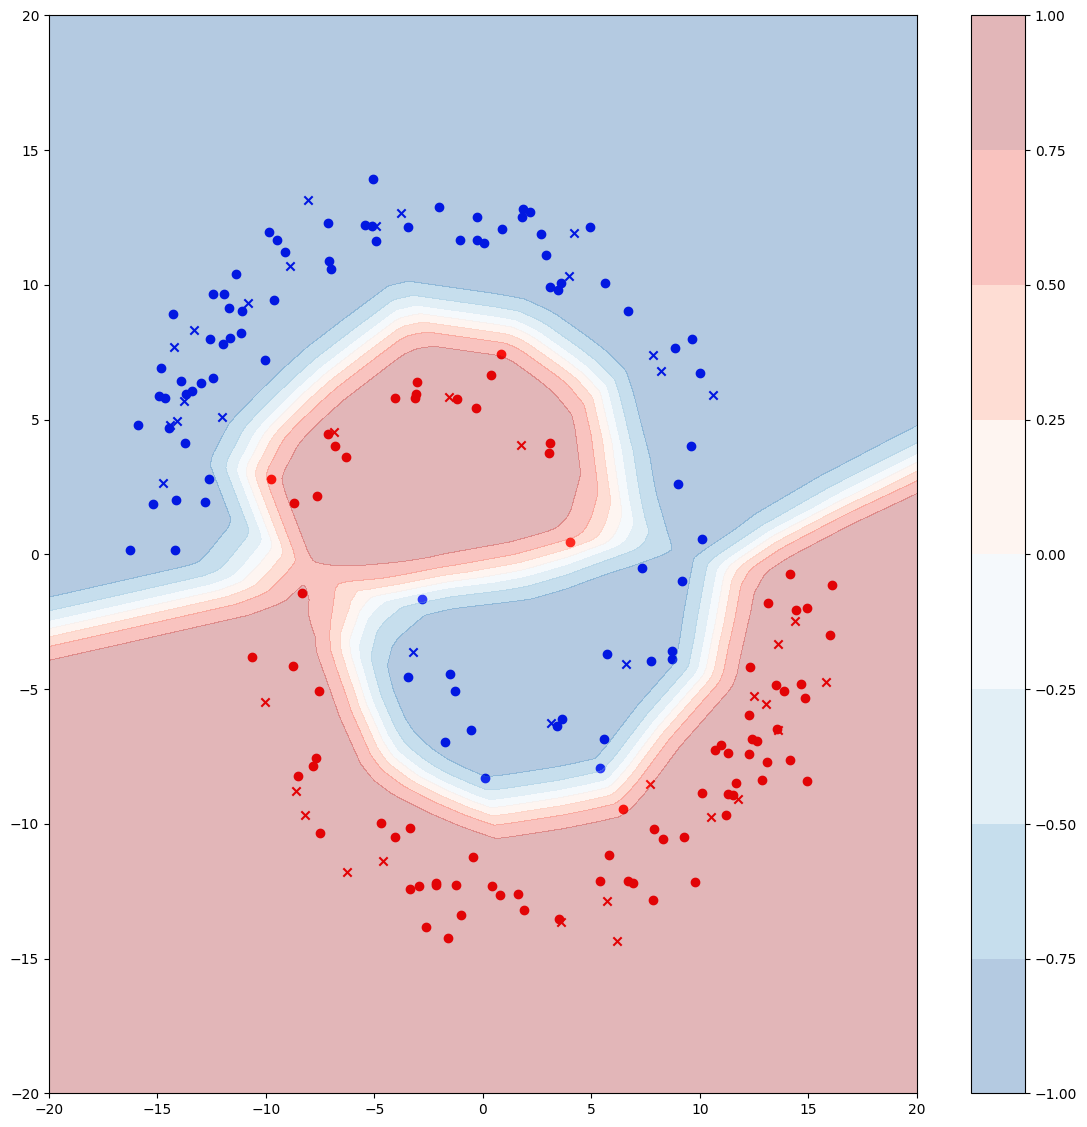

In [ ]:
AllModelsPreSoftmax = []
AllModelsAfterSoftmax = []
AllModelsZ_dif = []
fig1 = plt.figure(figsize=(14, 14))
i = 1
for Model_ in AllModels:

  AllModelsPreSoftmax.append( Model(inputs = Model_.input, outputs = Model_.layers[-2].output) )
  AllModelsAfterSoftmax.append( Model(inputs = Model_.layers[-1].input, outputs = Model_.layers[-1].output) )
  x_min, x_max = -20,20
  y_min, y_max = -20,20
  h = max(((x_max-x_min),(y_max-y_min)))/500
  xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                      np.arange(y_min, y_max+h,h))
  Z = Model_.predict(np.c_[xx.ravel(), yy.ravel()])
  Z_pred = np.argmax(Z,axis=1).reshape(xx.shape)
  AllModelsZ_dif.append( (Z[:,0]-Z[:,1]).reshape(xx.shape) )
  #plt.subplot(2, 2, i)
  plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
  plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
  plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
  plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
  plt.xlim(-20,20)
  plt.ylim(-20,20)
  CS =  plt.contourf(xx, yy, AllModelsZ_dif[-1],alpha=0.3,cmap=RedBlue)
  cbar = fig1.colorbar(CS)
  i = i + 1

7844/7844 [==============================] - 14s 2ms/step


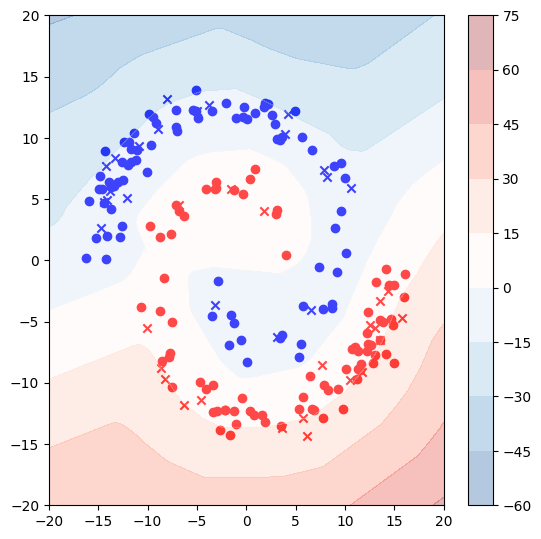

In [ ]:

AllModelsZ_dif = []
fig1 = plt.figure(figsize=(14, 14))
i = 1
for MyModelPreSoftmax in AllModelsPreSoftmax:

  Z = MyModelPreSoftmax.predict(np.c_[xx.ravel(), yy.ravel()])
  Z_pred = np.argmax(Z,axis=1).reshape(xx.shape)
  AllModelsZ_dif.append( (Z[:,0]-Z[:,1]).reshape(xx.shape) )

  plt.subplot(2, 2, i)
  plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
  plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
  plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
  plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
  plt.xlim(-20,20)
  plt.ylim(-20,20)
  CS =  plt.contourf(xx, yy, AllModelsZ_dif[-1],alpha=0.3,cmap=RedBlue)
  cbar = fig1.colorbar(CS)
  i = i + 1

In [ ]:
@tf.function
def get_hessian1(model,input,target, lossfunc = tf.keras.losses.CategoricalCrossentropy()):
    loss = lossfunc(model(input),target)
    return tf.hessians(loss, input)

In [ ]:
@tf.function
def get_hessian1_noloss(model,input,target, lossfunc = tf.keras.losses.CategoricalCrossentropy()):
    return tf.hessians(model(input), input)

In [ ]:
Heslist = []
Heslist_noloss = []
S_list = []
S_list_noloss = []
for i in range(trainset.shape[0]):
  Heslist.append(get_hessian1(MyModel,trainset[i:i+1],trainlabel[i:i+1]))
  Heslist_noloss.append( get_hessian1_noloss(MyModel,trainset[i:i+1],trainlabel[i:i+1]) )
  s,u,v = tf.linalg.svd(Heslist[-1][0].numpy().reshape((2,2)))
  S_list.append(s)
  s,u,v = tf.linalg.svd(Heslist_noloss[-1][0].numpy().reshape((2,2)))
  S_list_noloss.append(s)

In [ ]:
Heslist[0][0]

<tf.Tensor: shape=(1, 2, 1, 2), dtype=float64, numpy=
array([[[[ 0.01019792, -0.01330236]],

        [[-0.01330236,  0.01735185]]]])>

In [ ]:
trainset[np.linalg.norm(np.array(Heslist).reshape(160,4),axis=1)>0.005]

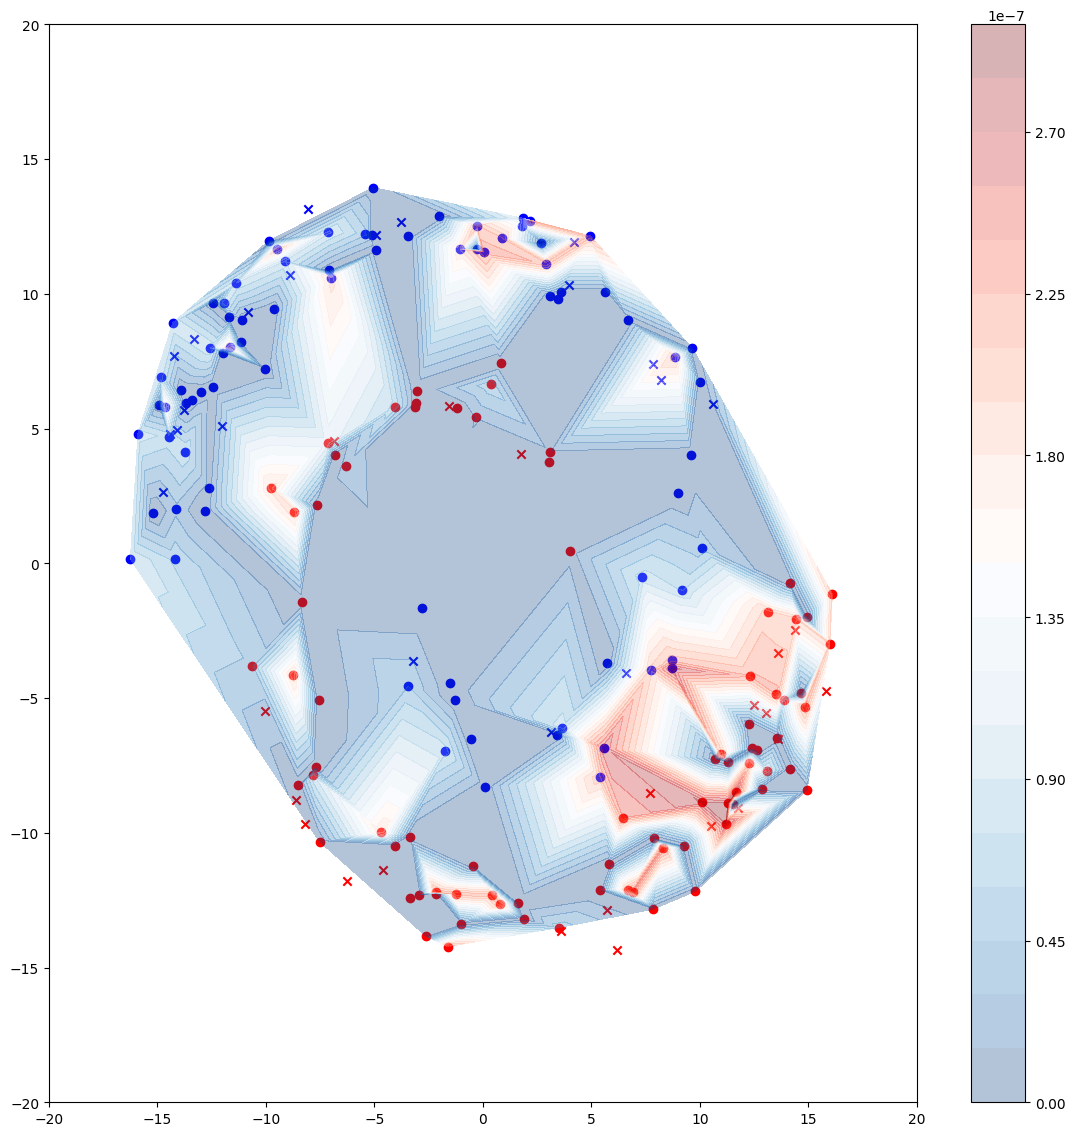

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.linalg.norm(np.array(Heslist_noloss).reshape(160,4),axis=1) ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

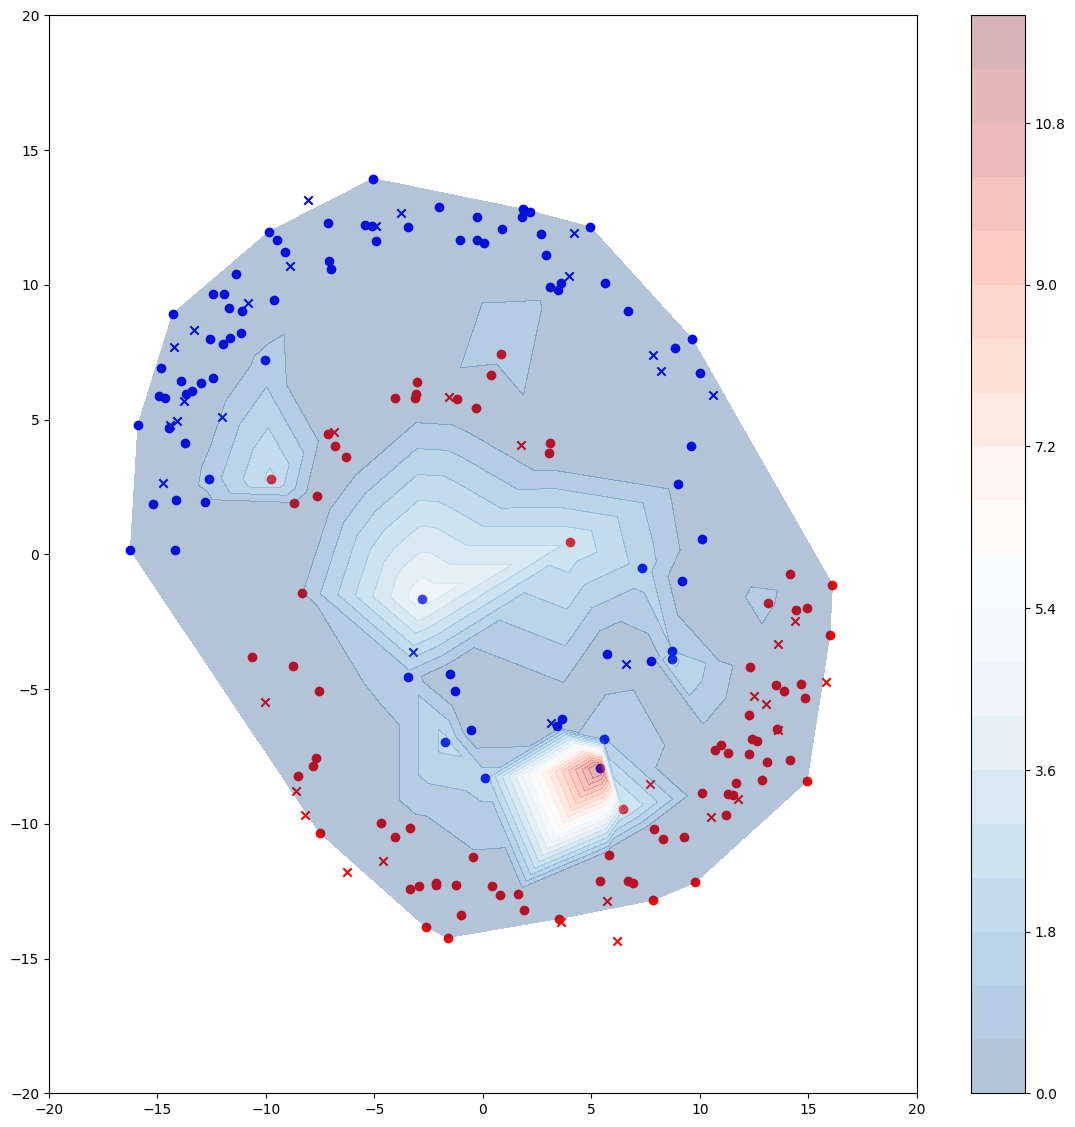

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.linalg.norm(np.array(Heslist).reshape(160,4),axis=1) ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

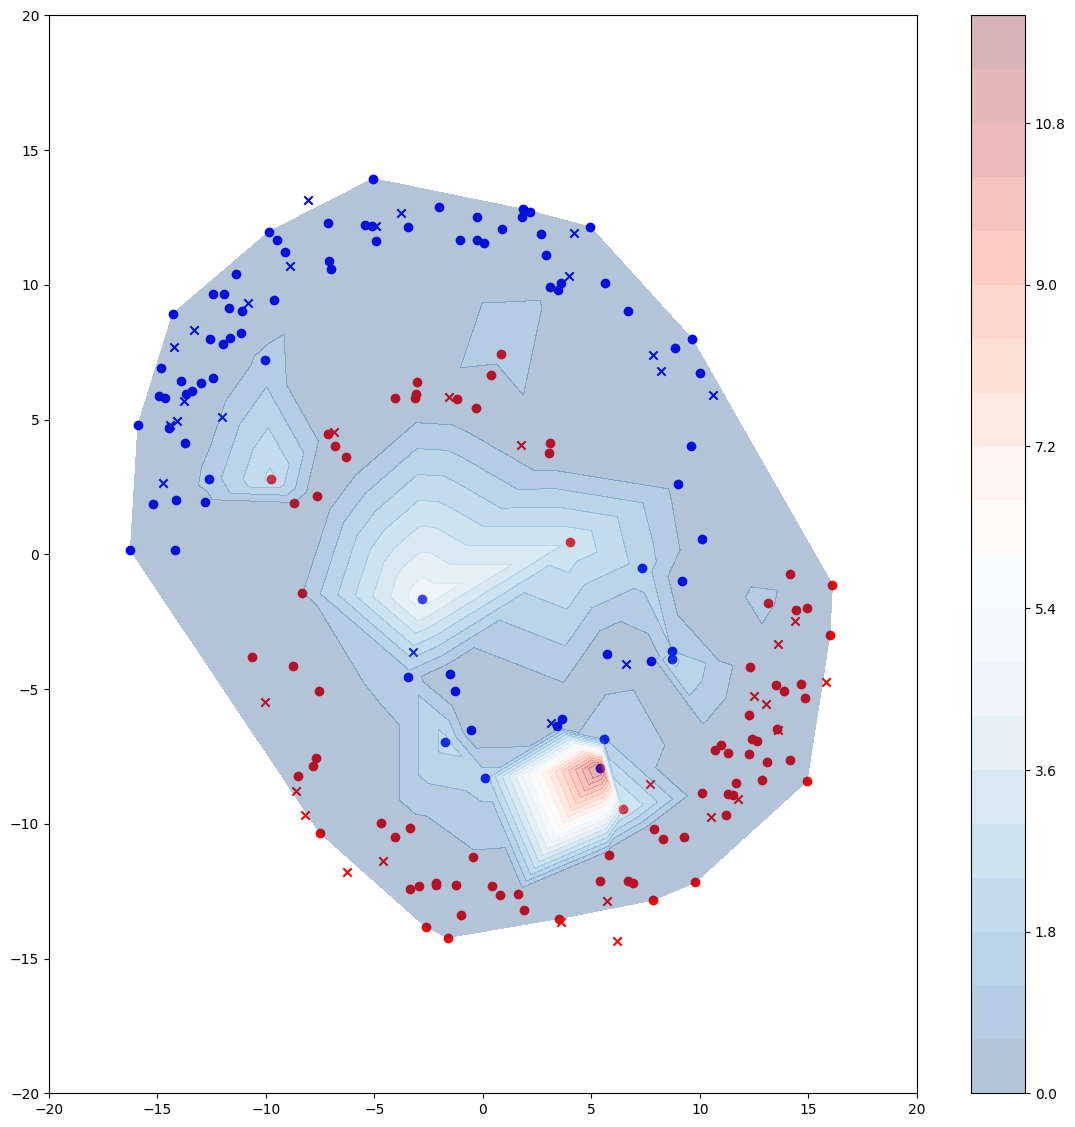

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.array(S_list)[:,0] ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

In [ ]:
np.median( np.array(S_list)[:,0] )

0.007424150453325183

In [ ]:
np.sort( np.array(S_list)[:,0] )[int(np.array(S_list)[:,0].shape[0]*1/4)]

0.0005238371024945506

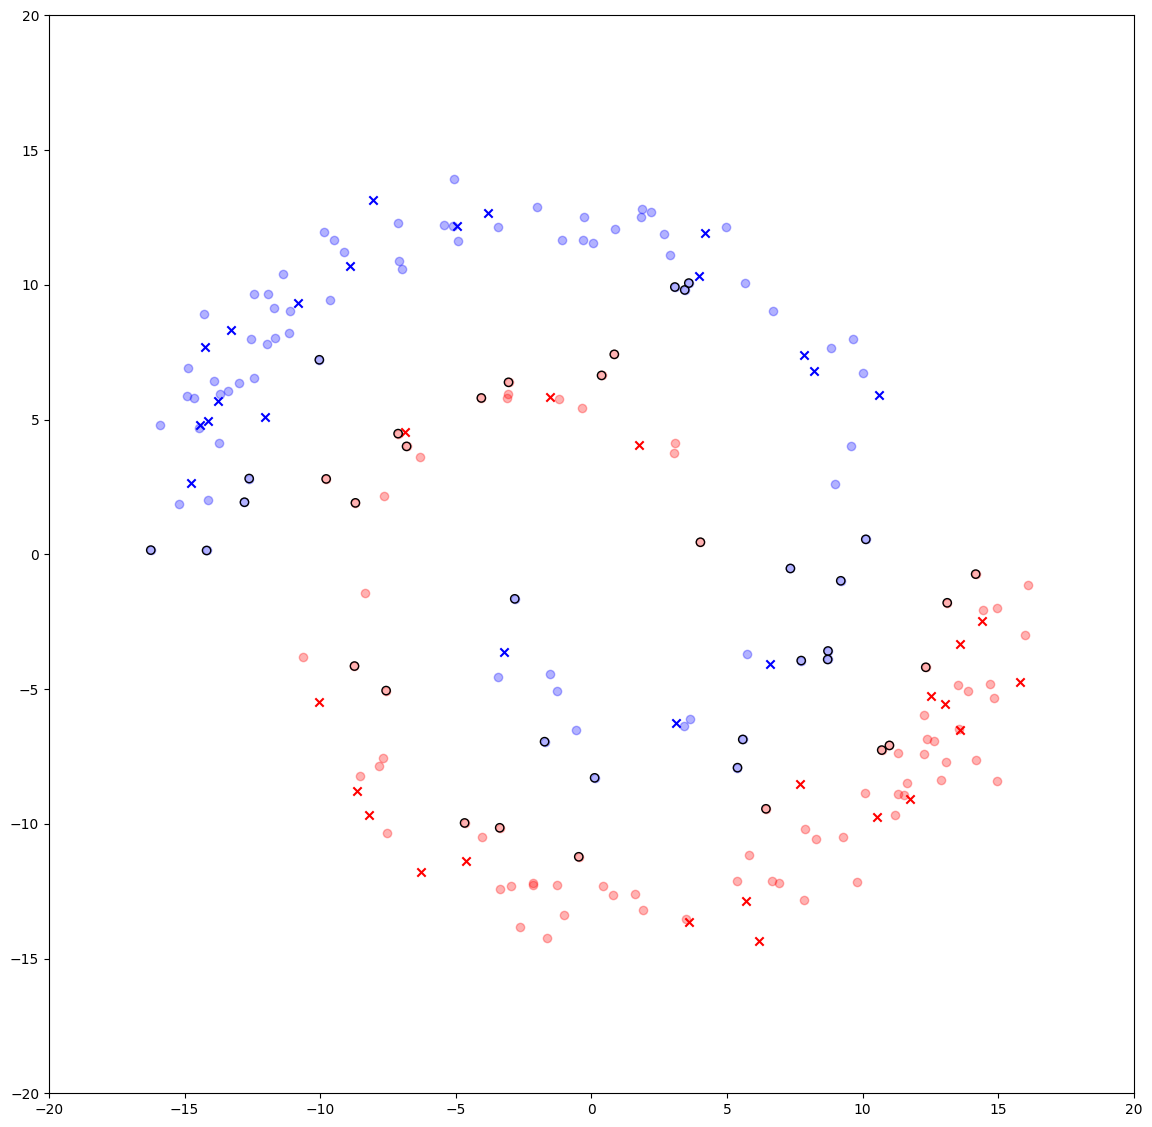

In [ ]:
mask=np.array(S_list)[:,0] > np.sort( np.array(S_list)[:,0] )[int(np.array(S_list)[:,0].shape[0]-40)] #*1/2
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue",alpha=0.3)
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red",alpha=0.3)
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.scatter(trainset[mask,0],trainset[mask,1], facecolors='none', edgecolors='black')
plt.xlim(-20,20)
plt.ylim(-20,20)
#CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.array(S_list)[:,0] ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)




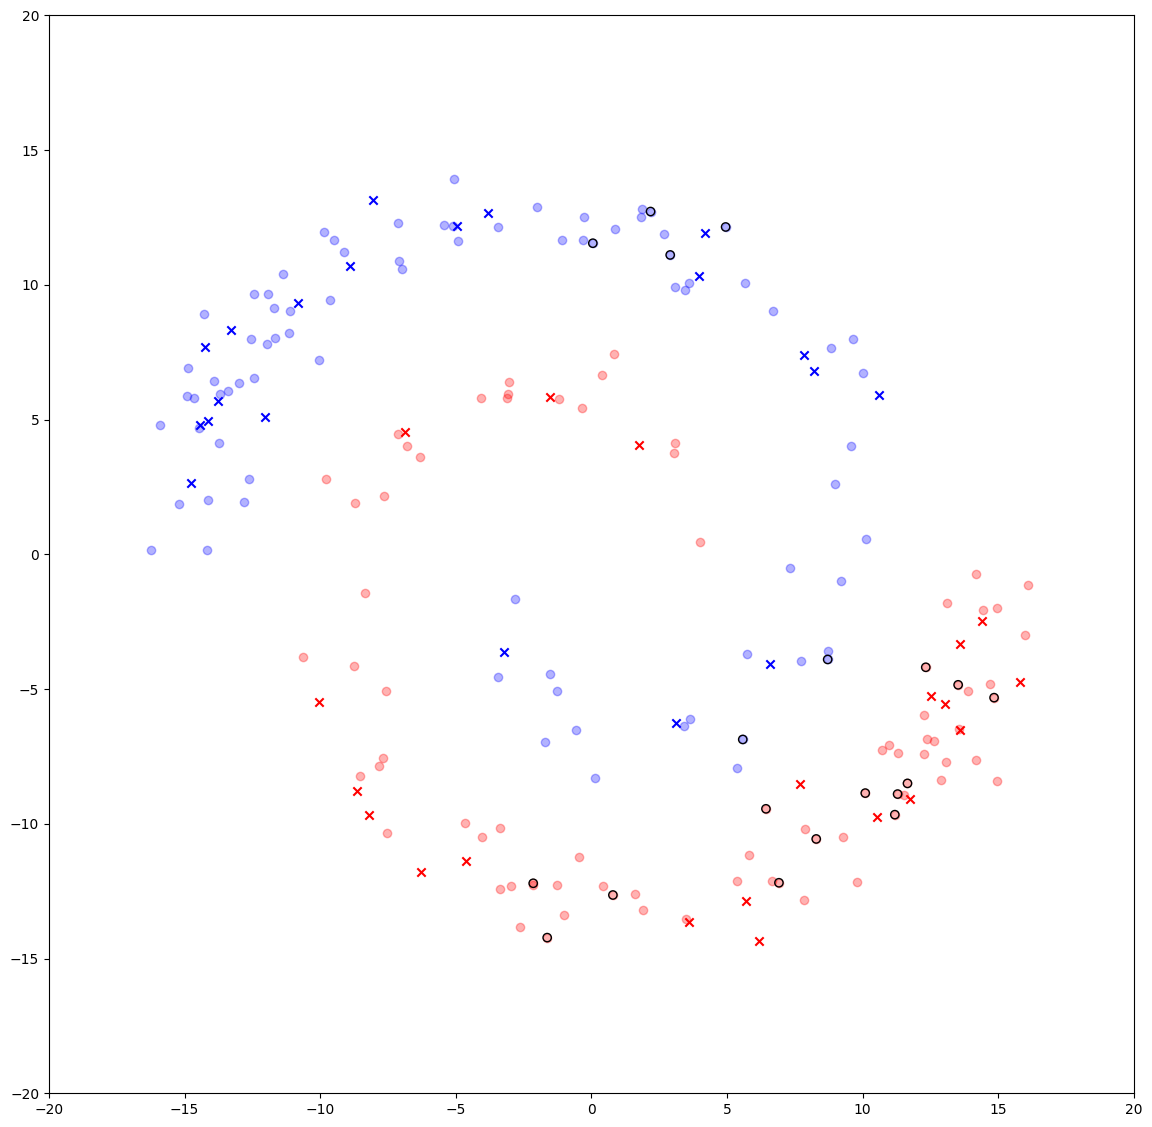

In [ ]:
mask=np.array(S_list_noloss)[:,0] > np.sort( np.array(S_list_noloss)[:,0] )[int(np.array(S_list_noloss)[:,0].shape[0]-20)]
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue",alpha=0.3)
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red",alpha=0.3)
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.scatter(trainset[mask,0],trainset[mask,1], facecolors='none', edgecolors='black')
plt.xlim(-20,20)
plt.ylim(-20,20)
#CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.array(S_list)[:,0] ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)




<ipython-input-78-769ab0475991>:10: UserWarning: The following kwargs were not used by contour: 'c', 'linewidth'
  ax.contour3D(xx, yy, AllModelsZ_dif[i-1],alpha=1,c='black',linewidth=3,antialiased=False,levels=np.linspace(-50, 50, 21))
<ipython-input-78-769ab0475991>:17: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 6
<ipython-input-78-769ab0475991>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter3D(testset[testlabel_==0,0],testset[testlabel_==0,1]    ,AllModelsPreSoftmax[i-1](testset[testlabel_==0])[:,0]  -AllModelsPreSoftmax[i-1](testset[testlabel_==0])[:,1]    ,c="darkblue",marker="x",edgecolors= "black",linewidths=1)
<ipython-input-78-769ab0475991>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker

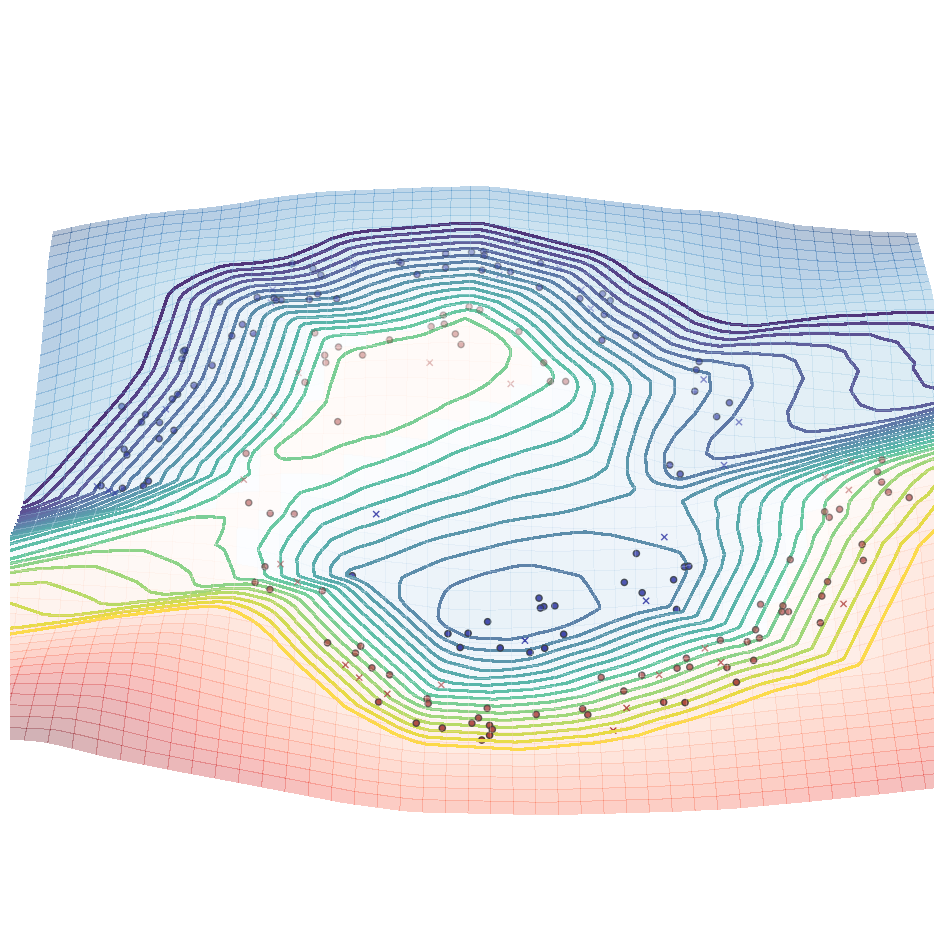

In [ ]:
back_ = 'white'
frnt_ = 'black'
fig1 = plt.figure(figsize=(12, 12))
ax = plt.subplot(1, 1, 1,projection='3d')

i=1

CS =  ax.plot_surface(xx, yy, AllModelsZ_dif[i-1],alpha=0.3,cmap=RedBlue,linewidth=3,antialiased=False)

ax.contour3D(xx, yy, AllModelsZ_dif[i-1],alpha=1,c='black',linewidth=3,antialiased=False,levels=np.linspace(-50, 50, 21))
plt.rcParams['contour.negative_linestyle'] = 'solid'
#colors_ = [CS.tcolors[i][0] for i,colors in enumerate(CS.tcolors)]
#colors_[10] =[ 0,0,0,1]
#plt.contour(CS, colors= colors_ )

ax.view_init(60, -90);
ax.dist = 6
#plt.gca().set_title(titles[i-1] + '   train: '+ str(np.round(AllModels[i-1].evaluate(trainset,trainlabel)[1],3))  + '  test: '+ str(np.round(AllModels[i-1].evaluate(testset,testlabel)[1],3))  )
ax.scatter3D(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],AllModelsPreSoftmax[i-1](trainset[trainlabel_==0])[:,0]-AllModelsPreSoftmax[i-1](trainset[trainlabel_==0])[:,1] ,c="darkblue",edgecolors= "black",linewidths=1)
ax.scatter3D(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],AllModelsPreSoftmax[i-1](trainset[trainlabel_==1])[:,0]-AllModelsPreSoftmax[i-1](trainset[trainlabel_==1])[:,1]  ,c="darkred",edgecolors= "black",linewidths=1)
ax.scatter3D(testset[testlabel_==0,0],testset[testlabel_==0,1]    ,AllModelsPreSoftmax[i-1](testset[testlabel_==0])[:,0]  -AllModelsPreSoftmax[i-1](testset[testlabel_==0])[:,1]    ,c="darkblue",marker="x",edgecolors= "black",linewidths=1)
ax.scatter3D(testset[testlabel_==1,0],testset[testlabel_==1,1]    ,AllModelsPreSoftmax[i-1](testset[testlabel_==1])[:,0]  -AllModelsPreSoftmax[i-1](testset[testlabel_==1])[:,1]    ,c="darkred",marker="x",edgecolors= "black",linewidths=1)
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.rcParams['contour.negative_linestyle'] = 'solid'
#colors_ = [CS.tcolors[i][0] for i,colors in enumerate(CS.tcolors)]
#colors_[10] =[ 0,0,0,1]
#plt.contour(CS, colors= colors_ )
i = i + 1
plt.axis('off')
ax.set_facecolor(back_)

In [ ]:
class LayerCharacteristics():
    def __init__(self):
      self.space_linearity_sum = []
      self.total_sum = []
      self.svd_weights = {}
      self.distances = {}
      self.neighbour_dict = {}
      self.U_dict = {}

In [ ]:
def ManifoldAngles(layerfeatlist,neighboursize1=10,dim_reduc_size=3,classsize=1):

  starttime = tf.timestamp()
  #tf.print("start: ")

  no_of_layers = len(layerfeatlist)
  reduction_quality = []
  class_chars = []

  for c1 in range(classsize):
    class_chars.append([])
    for layer_i in range(no_of_layers):
      class_chars[c1].append(LayerCharacteristics())
      layer_features = layerfeatlist[layer_i]

      layer_start = tf.timestamp()

      for i,x_i in enumerate(layer_features):

        class_chars[c1][layer_i].neighbour_dict[i] = tf.argsort(tf.norm( tf.math.subtract(layer_features,x_i) ,axis=1))[0:neighboursize1+1]# [1:neighboursize1+1]#templist

        W_i = tf.gather(layer_features,class_chars[c1][0].neighbour_dict[i])
        #class_chars[c1][layer_i].distances[i] = tf.math.reduce_euclidean_norm( tf.math.subtract( W_i , x_i ),axis=1)

        W_i = ( W_i - tf.math.reduce_mean(W_i,axis=0) )
        s, u, v = tf.linalg.svd( W_i )
        W_i_reduced = v[:,:dim_reduc_size]

        class_chars[c1][layer_i].svd_weights[i] = s[:dim_reduc_size]
        reduction_quality.append(  tf.reduce_sum( (s[:dim_reduc_size])/ tf.reduce_sum(s) ) )
        #tf.print("Reduction quality: ",  reduction_quality[-1])
        #if reduction_quality[-1] < 0.9: tf.print("Warning! Reduction quality: ",  reduction_quality[-1], i)
        class_chars[c1][layer_i].U_dict[i] = W_i_reduced

      #tf.print("--layer time: ", tf.timestamp() - layer_start)
      class_chars[c1][layer_i].space_linearity_sum = 0.0
      angle_start = tf.timestamp()

      manifold_neighbour_angle_sum=[]
      for i in range(len(class_chars[c1][layer_i].U_dict)):
        manifold_neighbour_angle_sum_temp=[]
        manifold_neighbour_angle_sum.append([])

        for j in class_chars[c1][0].neighbour_dict[i]:
          if i != j:
            teta =  tf.matmul(  tf.transpose(class_chars[c1][layer_i].U_dict[i]),  class_chars[c1][layer_i].U_dict[int(j)]   )
            weights =  tf.matmul(  tf.transpose( tf.expand_dims(class_chars[c1][layer_i].svd_weights[i],0)), tf.expand_dims(class_chars[c1][layer_i].svd_weights[int(j)],0)  )
            Q = teta*weights
            #tf.print(i,"-----", j)
            #Q =  tf.matmul(  tf.transpose( tf.matmul( class_chars[c1][layer_i].U_dict[i], np.diag(class_chars[c1][layer_i].svd_weights[i]) ) ), tf.matmul( class_chars[c1][layer_i].U_dict[int(j)], np.diag(class_chars[c1][layer_i].svd_weights[int(j)]) ) )

            s, u, v = tf.linalg.svd( Q )

            tetaw = tf.reduce_mean(s)/tf.linalg.trace(weights)
            angles = tf.math.acos( tf.clip_by_value(tetaw,-1,1) )
            manifold_neighbour_angle_sum_temp.append( angles ) #angles
            #manifold_neighbour_angle_sum_temp.append( tf.clip_by_value(tetaw,-1,1)*np.pi/2 )

        #manifold_neighbour_angle_sum[i].append(tf.reduce_mean(tf.convert_to_tensor(manifold_neighbour_angle_sum_temp)) * tf.reduce_mean(class_chars[c1][layer_i].distances[i]) )
        manifold_neighbour_angle_sum[i].append(tf.reduce_mean(tf.convert_to_tensor(manifold_neighbour_angle_sum_temp)))
      #class_chars[c1][layer_i].space_linearity_sum = tf.reduce_sum( tf.convert_to_tensor(manifold_neighbour_angle_sum )) / tf.reduce_sum([tf.reduce_mean( x ) for x in list(class_chars[c1][layer_i].distances.values())])
      class_chars[c1][layer_i].space_linearity_sum = tf.reduce_mean( tf.convert_to_tensor(manifold_neighbour_angle_sum ))
      #tf.print("--angle time: ", tf.timestamp() - angle_start)

  #tf.print("endtime: ", tf.timestamp() - starttime)
  #if no_of_layers==1: tf.print("Average reduction quality: ",  tf.reduce_mean(reduction_quality))
  #tf.print("endtime: ", tf.timestamp() - starttime)
  return manifold_neighbour_angle_sum #class_chars,

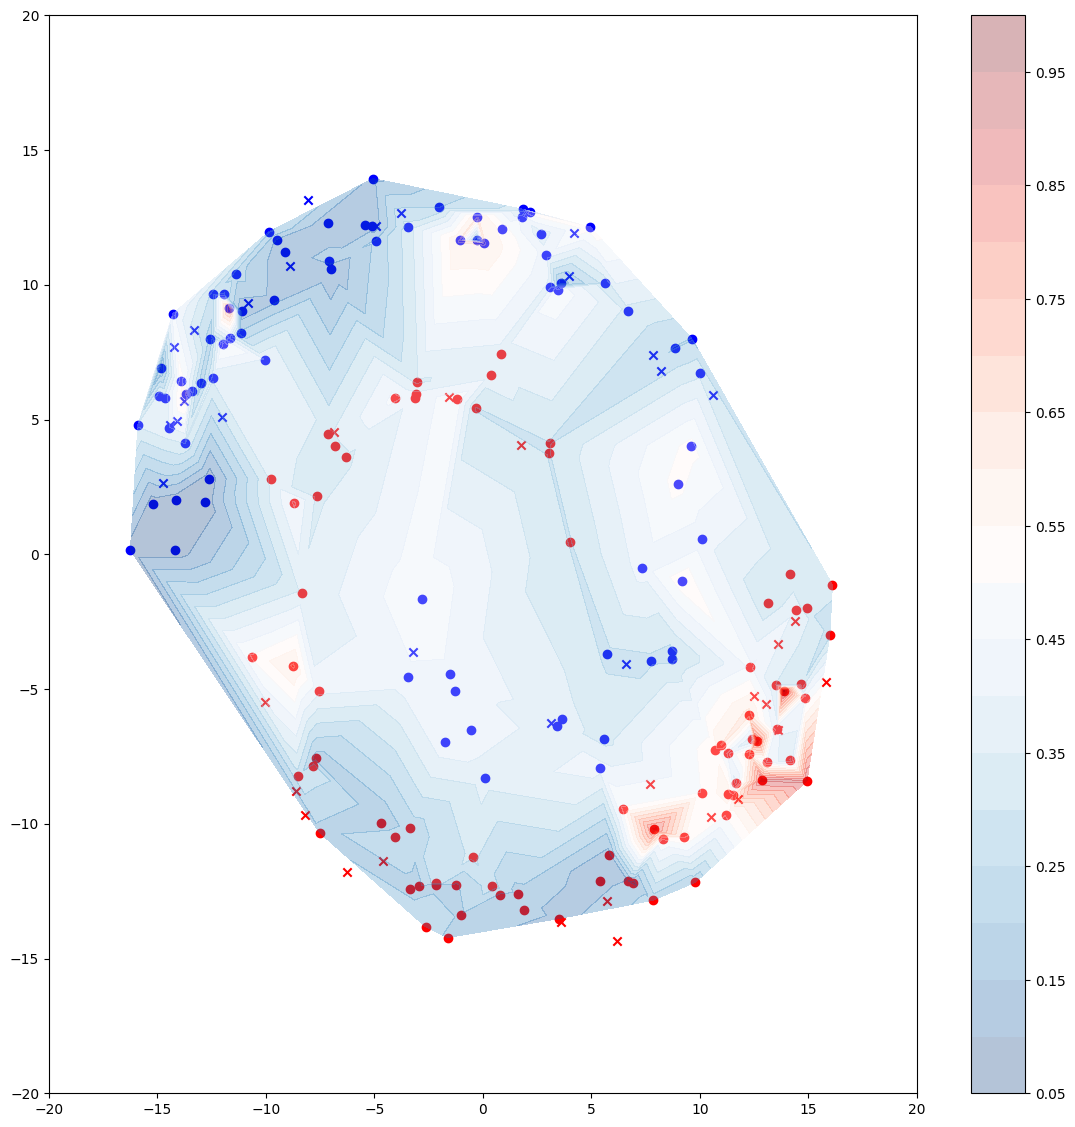

In [ ]:
MAng = np.array(ManifoldAngles([trainset[trainlabel_==0]],10,1))
MAng = np.vstack( [MAng , np.array(ManifoldAngles([trainset[trainlabel_==1]],10,1)) ])
MAng = MAng.flatten()
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], MAng ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

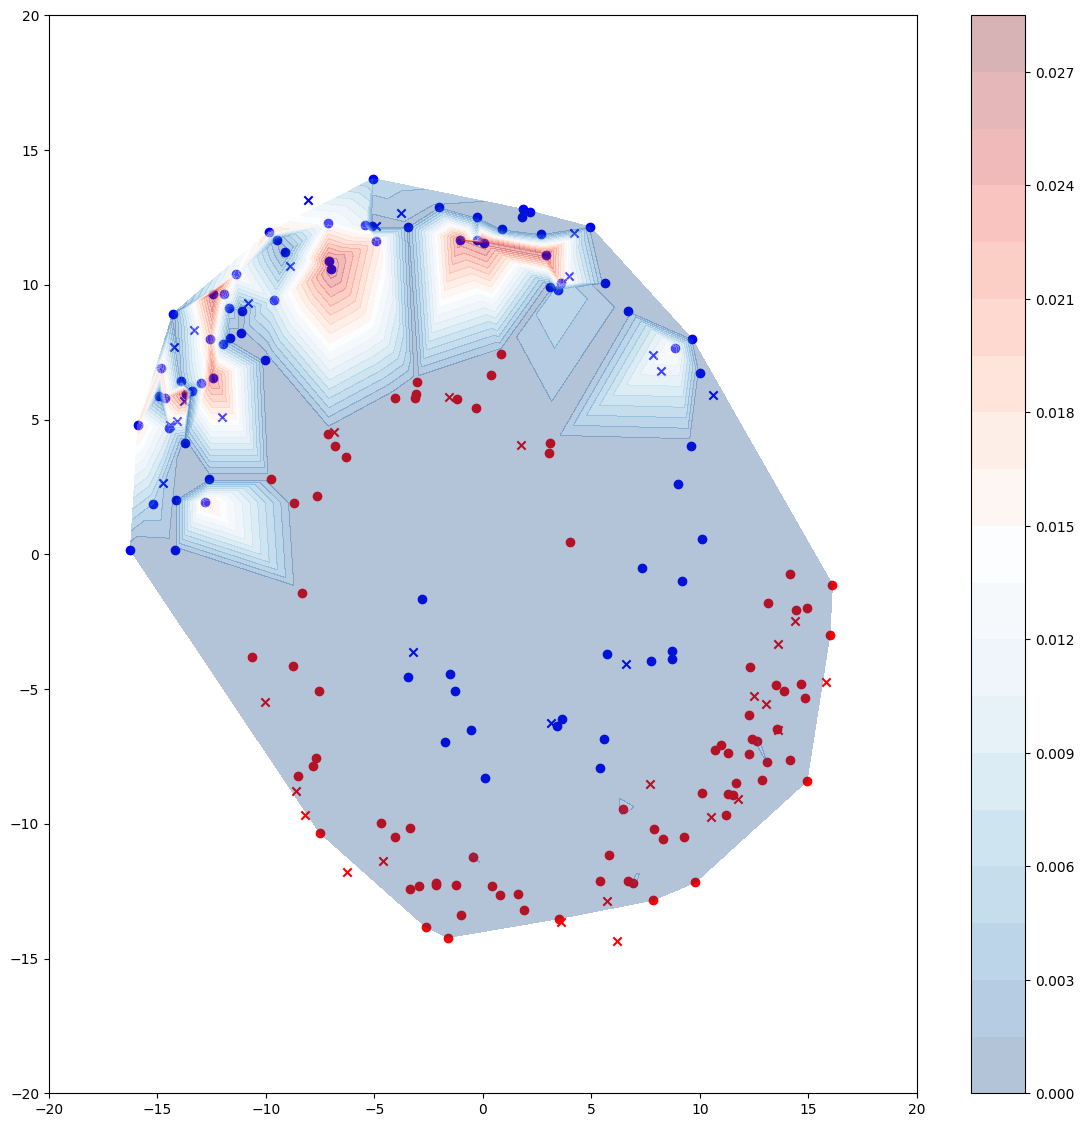

In [ ]:
MAng_O = np.array(ManifoldAngles(  [MyModel(trainset[trainlabel_==0])]  ,15,1))
MAng_O = np.vstack( [MAng_O ,  np.array(ManifoldAngles(  [MyModel(trainset[trainlabel_==1])]  ,15,1)) ])
MAng_O = MAng_O.flatten()
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], MAng_O ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

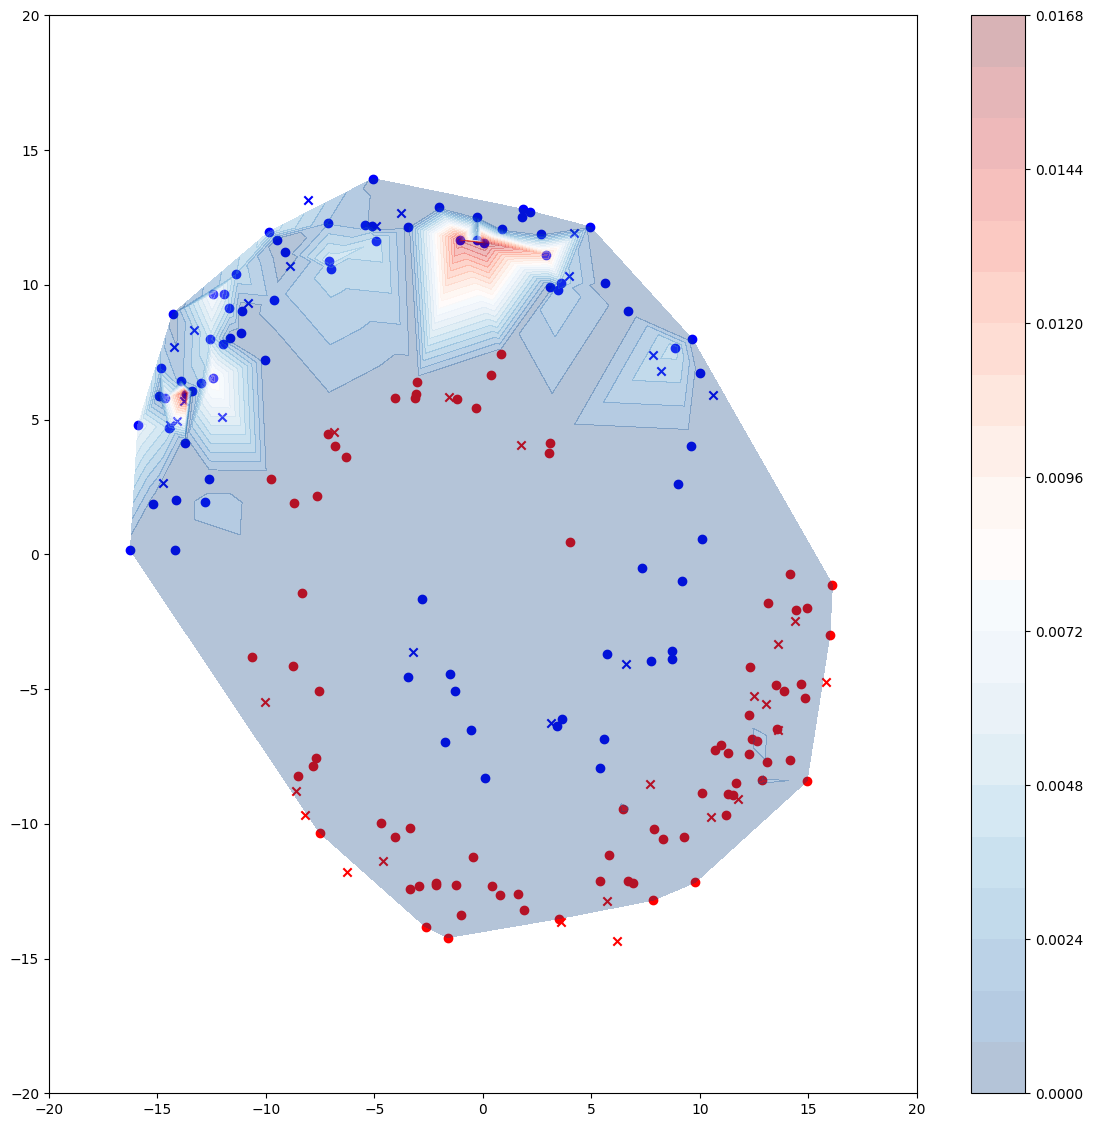

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], MAng_O*MAng ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

--

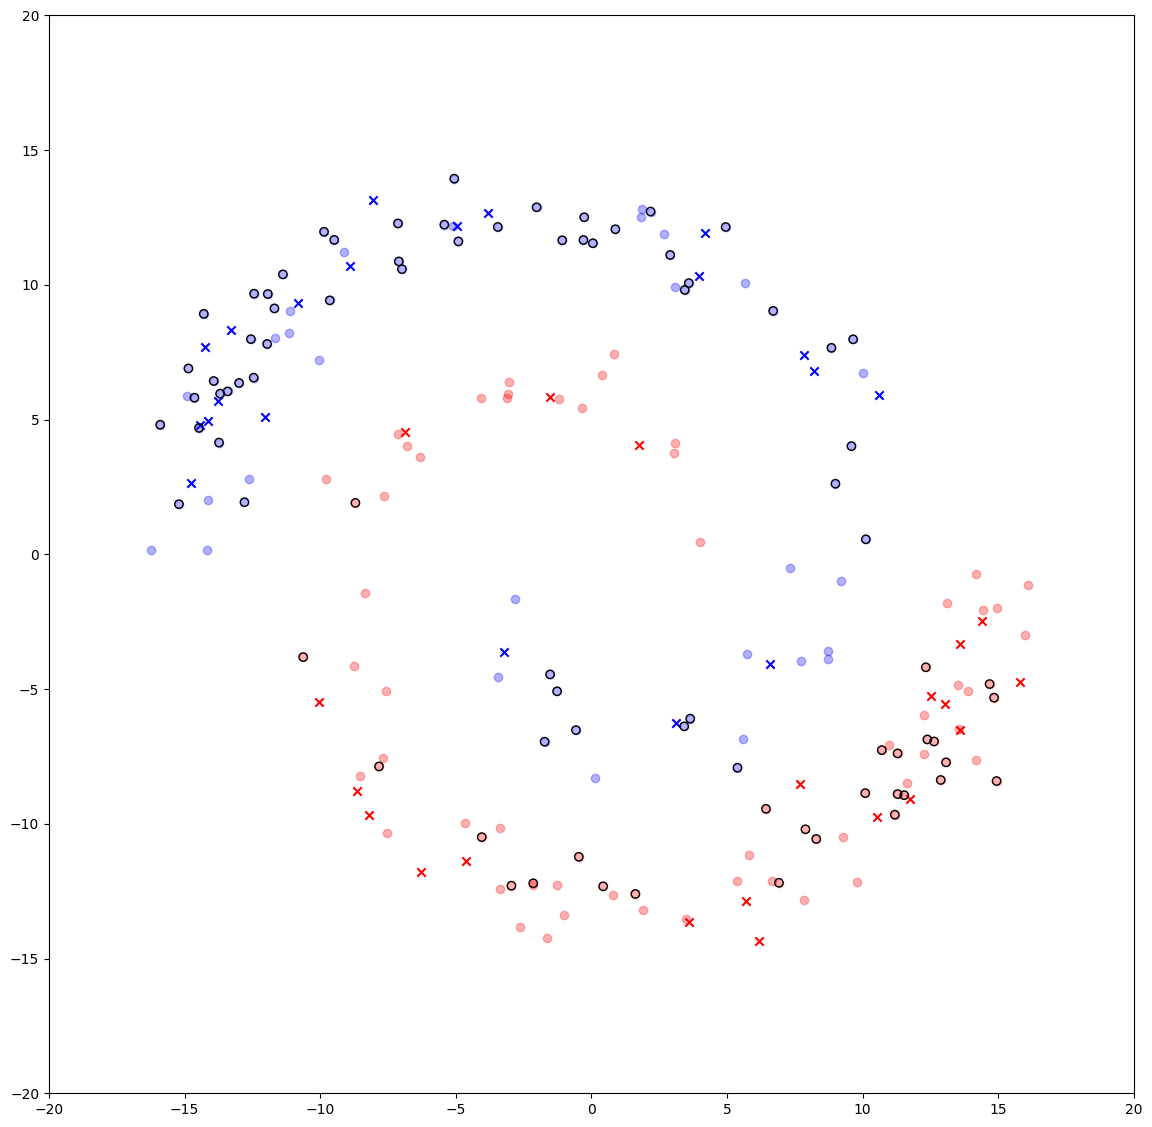

In [ ]:
mask=MAng_O*MAng>np.median(MAng_O*MAng)
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue",alpha=0.3)
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red",alpha=0.3)
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.scatter(trainset[mask,0],trainset[mask,1], facecolors='none', edgecolors='black')
plt.xlim(-20,20)
plt.ylim(-20,20)
#CS =  plt.tricontourf(trainset[:,0], trainset[:,1], MAng ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

In [ ]:
Heslist = []
S_list = []
for i in range(trainset.shape[0]):
  Heslist.append(get_hessian1_noloss(MyModel,trainset[i:i+1],trainlabel[i:i+1]))
  s,u,v = tf.linalg.svd(Heslist[-1][0].numpy().reshape((2,2)))
  S_list.append(s)

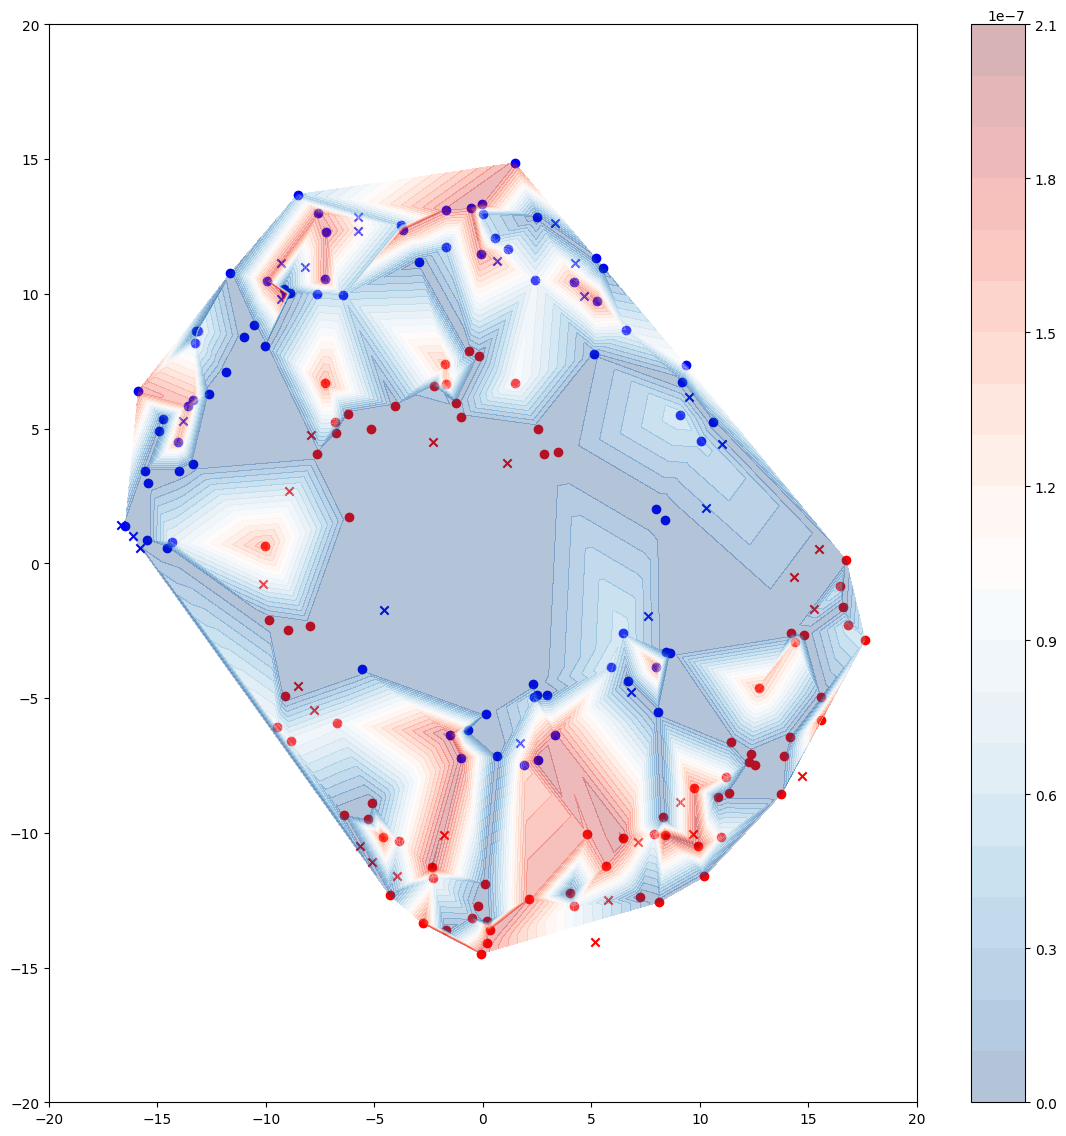

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.linalg.norm(np.array(Heslist).reshape(160,4),axis=1) ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

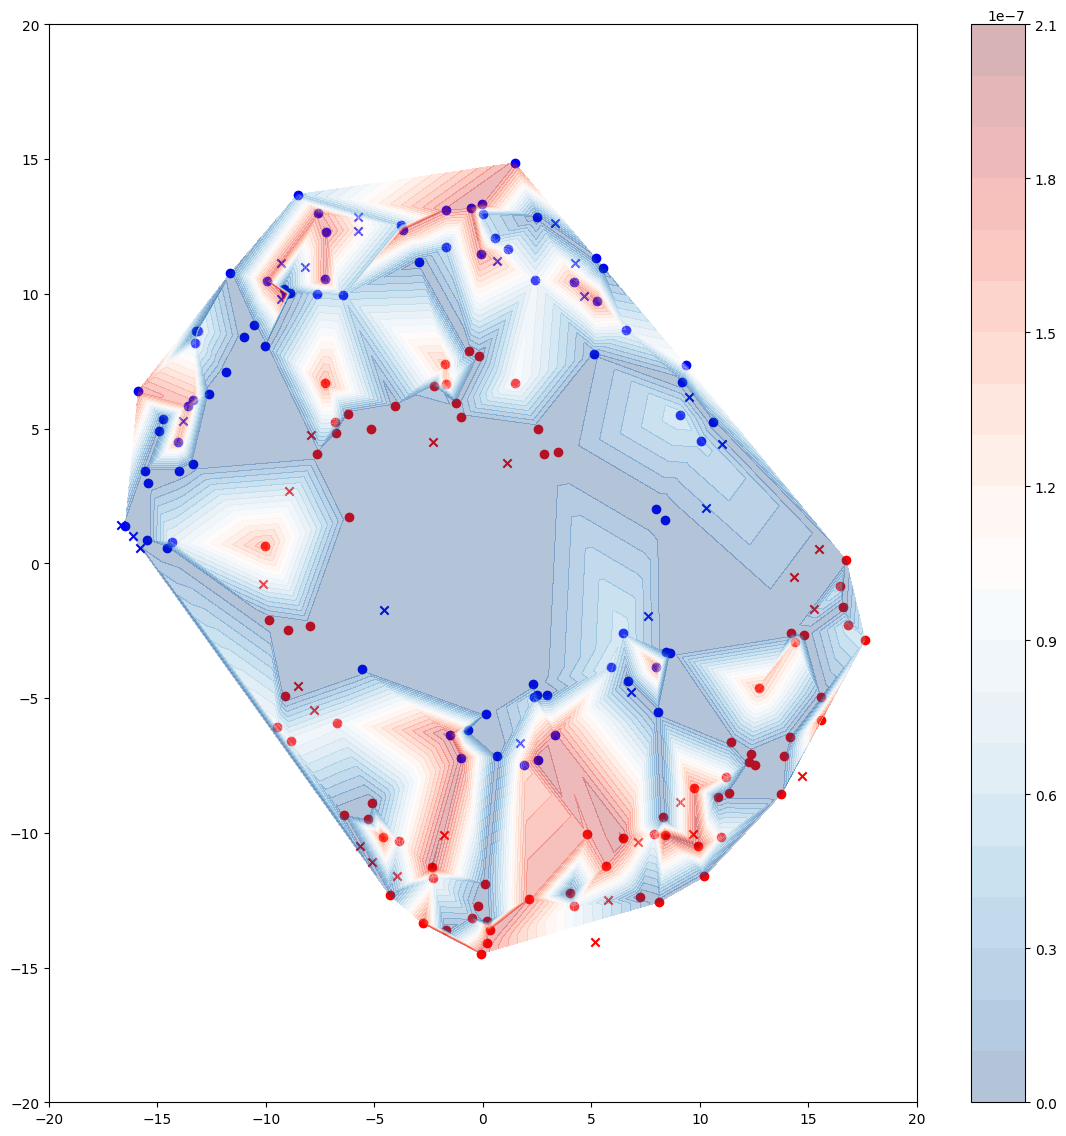

In [ ]:
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue")
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red")
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.xlim(-20,20)
plt.ylim(-20,20)
CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.array(S_list)[:,0] ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

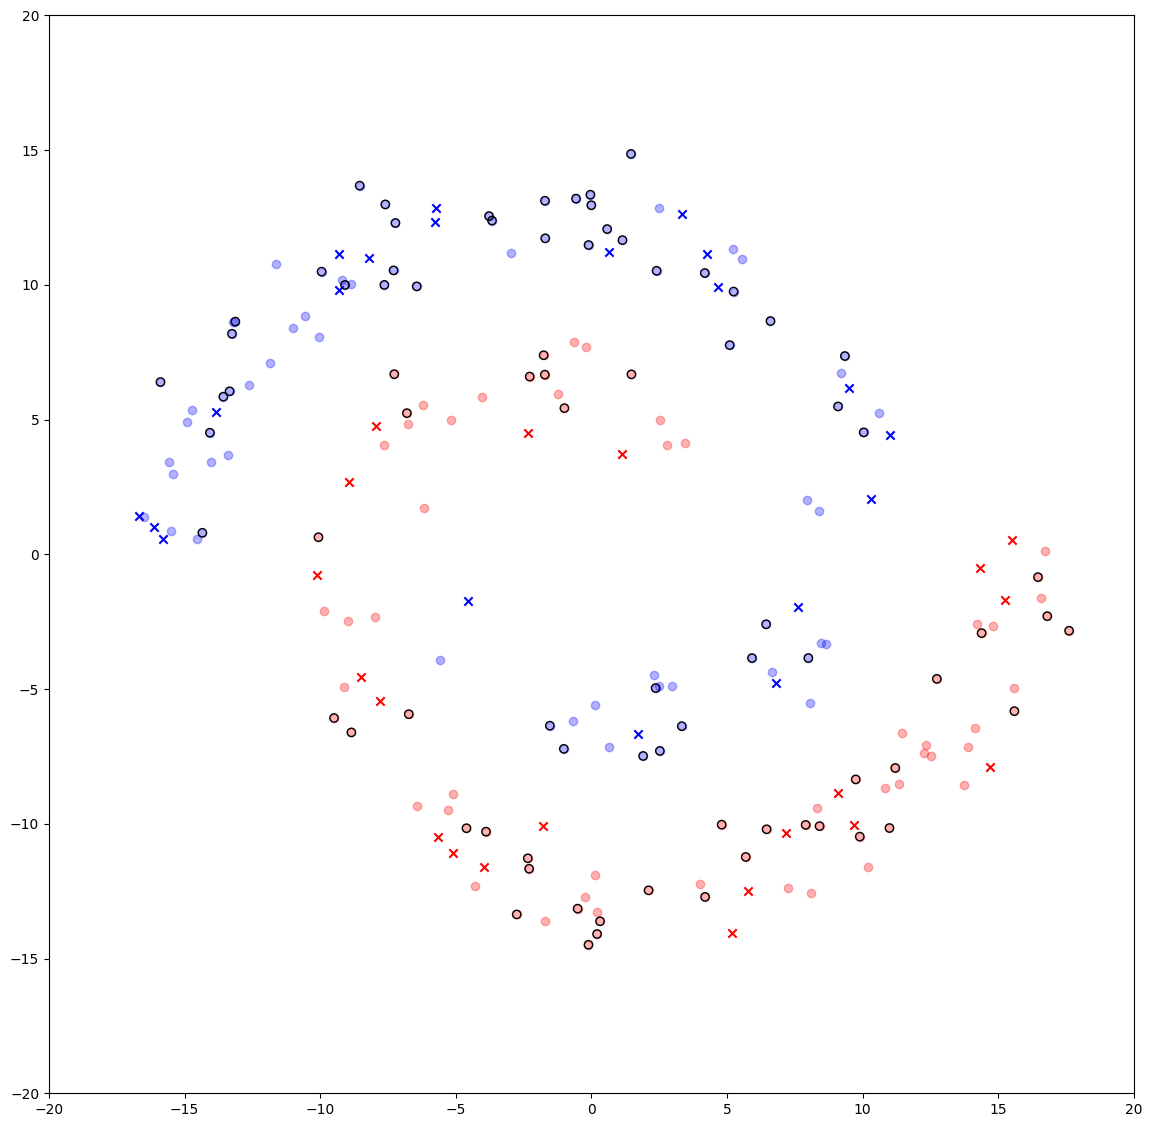

In [ ]:
mask=np.array(S_list)[:,0]> np.median( np.array(S_list)[:,0] )
fig1 = plt.figure(figsize=(14, 14))
plt.scatter(trainset[trainlabel_==0,0],trainset[trainlabel_==0,1],c="blue",alpha=0.3)
plt.scatter(trainset[trainlabel_==1,0],trainset[trainlabel_==1,1],c="red",alpha=0.3)
plt.scatter(testset[testlabel_==0,0],testset[testlabel_==0,1],c="blue",marker="x")
plt.scatter(testset[testlabel_==1,0],testset[testlabel_==1,1],c="red",marker="x")
plt.scatter(trainset[mask,0],trainset[mask,1], facecolors='none', edgecolors='black')
plt.xlim(-20,20)
plt.ylim(-20,20)
#CS =  plt.tricontourf(trainset[:,0], trainset[:,1], np.array(S_list)[:,0] ,alpha=0.3,cmap=RedBlue, levels = 21)
cbar = fig1.colorbar(CS)

------------------------------

In [ ]:
np.log10(80)

1.9030899869919435

In [ ]:
np.log10(20)

1.3010299956639813

In [ ]:
np.logspace(1.904,1.301,5).astype('int')

array([80, 56, 40, 28, 19])

In [ ]:
datasizes = np.logspace(1.904,1.301,5).astype('int')
namelist = []
valacclist = []
namelist.append('Random selection')
print(namelist[-1] + ":")
for datasize in tqdm(datasizes):
  indicies = np.random.choice(trainset[trainlabel[:,0]==1].shape[0],datasize,replace=False)
  Reduced_X_train = trainset[trainlabel[:,0]==1][indicies]
  Reduced_Y_train = trainlabel[trainlabel[:,0]==1][indicies]
  #for c in range(1,10):
  indicies = np.random.choice(trainset[trainlabel[:,0]==0].shape[0],datasize,replace=False)
  Reduced_X_train = np.vstack([ Reduced_X_train, trainset[trainlabel[:,0]==0][indicies] ])
  Reduced_Y_train = np.vstack([ Reduced_Y_train, trainlabel[trainlabel[:,0]==0][indicies] ])
  print(Reduced_X_train.shape)

  valacclist.append([])
  for i in range(5):
    MyModel = tf.keras.Sequential()
    MyModel.add(tf.keras.layers.Dense(45, kernel_regularizer = tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(45,  kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(2))
    MyModel.add(tf.keras.layers.Softmax())
    MyModel.compile( optimizer=tf.keras.optimizers.Adam() , loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[ tf.keras.metrics.CategoricalAccuracy()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50,restore_best_weights=True) #
    history = MyModel.fit(Reduced_X_train,Reduced_Y_train,epochs=300,validation_data=(testset,testlabel),callbacks=[callback],verbose=False)
    print(len(history.history['categorical_accuracy']))
    #nt.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['categorical_accuracy'])
    #history  = nt.fit(Reduced_X_train, Reduced_Y_train,epochs=20,validation_data=(X_test, Y_test)  ,verbose=0, batch_size = 128  ) #, callbacks=[callback]
    print(f"  train acc = {history.history['categorical_accuracy'][-1]} val acc = {history.history['val_categorical_accuracy'][-1]}")
    valacclist[-1].append(history.history['val_categorical_accuracy'][-1])

namelist.append('High Hessian with loss')
print(namelist[-1] + ":")
for datasize in tqdm(datasizes):
  indicies = np.argsort( np.array(S_list)[trainlabel[:,0]==1,0]) [-datasize:]  #sort low to high
  Reduced_X_train = trainset[trainlabel[:,0]==1][indicies]
  Reduced_Y_train = trainlabel[trainlabel[:,0]==1][indicies]
  #for c in range(1,10):
  indicies = np.argsort( np.array(S_list)[trainlabel[:,0]==0,0]) [-datasize:]
  Reduced_X_train = np.vstack([ Reduced_X_train, trainset[trainlabel[:,0]==0][indicies] ])
  Reduced_Y_train = np.vstack([ Reduced_Y_train, trainlabel[trainlabel[:,0]==0][indicies] ])
  print(Reduced_X_train.shape)

  valacclist.append([])
  for i in range(5):
    MyModel = tf.keras.Sequential()
    MyModel.add(tf.keras.layers.Dense(45, kernel_regularizer = tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(45,  kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(2))
    MyModel.add(tf.keras.layers.Softmax())
    MyModel.compile( optimizer=tf.keras.optimizers.Adam() , loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[ tf.keras.metrics.CategoricalAccuracy()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50,restore_best_weights=True) #
    history = MyModel.fit(Reduced_X_train,Reduced_Y_train,epochs=300,validation_data=(testset,testlabel),callbacks=[callback],verbose=False)
    print(len(history.history['categorical_accuracy']))
    #nt.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['categorical_accuracy'])
    #history  = nt.fit(Reduced_X_train, Reduced_Y_train,epochs=20,validation_data=(X_test, Y_test)  ,verbose=0, batch_size = 128  ) #, callbacks=[callback]
    print(f"  train acc = {history.history['categorical_accuracy'][-1]} val acc = {history.history['val_categorical_accuracy'][-1]}")
    valacclist[-1].append(history.history['val_categorical_accuracy'][-1])

namelist.append('High Hessian w/o loss')
print(namelist[-1] + ":")
for datasize in tqdm(datasizes):
  indicies = np.argsort( np.array(S_list_noloss)[trainlabel[:,0]==1,0]) [-datasize:]  #sort low to high
  Reduced_X_train = trainset[trainlabel[:,0]==1][indicies]
  Reduced_Y_train = trainlabel[trainlabel[:,0]==1][indicies]
  #for c in range(1,10):
  indicies = np.argsort( np.array(S_list_noloss)[trainlabel[:,0]==0,0]) [-datasize:]
  Reduced_X_train = np.vstack([ Reduced_X_train, trainset[trainlabel[:,0]==0][indicies] ])
  Reduced_Y_train = np.vstack([ Reduced_Y_train, trainlabel[trainlabel[:,0]==0][indicies] ])
  print(Reduced_X_train.shape)

  valacclist[-1].append([])
  for i in range(5):
    MyModel = tf.keras.Sequential()
    MyModel.add(tf.keras.layers.Dense(45, kernel_regularizer = tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(45,  kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    MyModel.add(tf.keras.layers.ReLU())
    MyModel.add(tf.keras.layers.Dense(2))
    MyModel.add(tf.keras.layers.Softmax())
    MyModel.compile( optimizer=tf.keras.optimizers.Adam() , loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[ tf.keras.metrics.CategoricalAccuracy()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50,restore_best_weights=True) #
    history = MyModel.fit(Reduced_X_train,Reduced_Y_train,epochs=300,validation_data=(testset,testlabel),callbacks=[callback],verbose=False)
    print(len(history.history['categorical_accuracy']))
    #nt.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['categorical_accuracy'])
    #history  = nt.fit(Reduced_X_train, Reduced_Y_train,epochs=20,validation_data=(X_test, Y_test)  ,verbose=0, batch_size = 128  ) #, callbacks=[callback]
    print(f"  train acc = {history.history['categorical_accuracy'][-1]} val acc = {history.history['val_categorical_accuracy'][-1]}")
    valacclist[-1].append(history.history['val_categorical_accuracy'][-1])
namelist.append('High Hessian w/o loss')

Random selection:


  0%|          | 0/5 [00:00<?, ?it/s]

(160, 2)
300
  train acc = 0.9937499761581421 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.9937499761581421 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(112, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.9910714030265808 val acc = 1.0
(80, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.987500011920929 val acc = 1.0
(56, 2)
300
  train acc = 0.9821428656578064 val acc = 0.9750000238418579
300
  train acc = 0.9285714030265808 val acc = 0.8999999761581421
300
  train acc = 0.9464285969734192 val acc = 0.949999988079071
300
  train acc = 0.9464285969734192 val acc = 0.949999988079071
300
  train acc = 0.9107142686843872 val acc = 0.8999999761581421
(38, 2)
300
  train acc = 0.86842107772

  0%|          | 0/5 [00:00<?, ?it/s]

(160, 2)
300
  train acc = 0.9937499761581421 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(112, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.9910714030265808 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(80, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.987500011920929 val acc = 1.0
300
  train acc = 0.987500011920929 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(56, 2)
300
  train acc = 0.9821428656578064 val acc = 1.0
300
  train acc = 0.9821428656578064 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(38, 2)
300
  train acc = 0.7631579041481018 val acc = 0.699999988079071
300
  train acc = 0.8947368264198303 val acc = 0.6499999761581421
300
  train acc = 0

  0%|          | 0/5 [00:00<?, ?it/s]

(160, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.9937499761581421 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
(112, 2)
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 1.0 val acc = 1.0
300
  train acc = 0.9910714030265808 val acc = 1.0
(80, 2)
300
  train acc = 0.9125000238418579 val acc = 0.875
300
  train acc = 0.8999999761581421 val acc = 0.8500000238418579
300
  train acc = 0.9375 val acc = 0.8999999761581421
300
  train acc = 0.9375 val acc = 0.8999999761581421
300
  train acc = 0.987500011920929 val acc = 0.9750000238418579
(56, 2)
300
  train acc = 0.9821428656578064 val acc = 0.875
300
  train acc = 1.0 val acc = 0.875
300
  train acc = 0.9821428656578064 val acc = 0.875
300
  train acc = 0.9821428656578064 val acc = 0.875
300
  train acc = 0.9821428656578064 val acc = 0.875
(38, 2)
300
  train acc = 0.973684

In [ ]:
valacclist[0]

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9750000238418579,
  0.8999999761581421,
  0.949999988079071,
  0.949999988079071,
  0.8999999761581421],
 [0.8999999761581421, 0.925000011920929, 0.925000011920929, 0.875, 0.875],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [0.699999988079071,
  0.6499999761581421,
  0.675000011920929,
  0.5,
  0.574999988079071],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [0.875,
  0.8500000238418579,
  0.8999999761581421,
  0.8999999761581421,
  0.9750000238418579],
 [0.875, 0.875, 0.875, 0.875, 0.875],
 [0.800000011920929,
  0.8500000238418579,
  0.8500000238418579,
  0.800000011920929,
  0.8500000238418579]]

array([1.        , 1.        , 1.        , 0.93499999, 0.9       ])

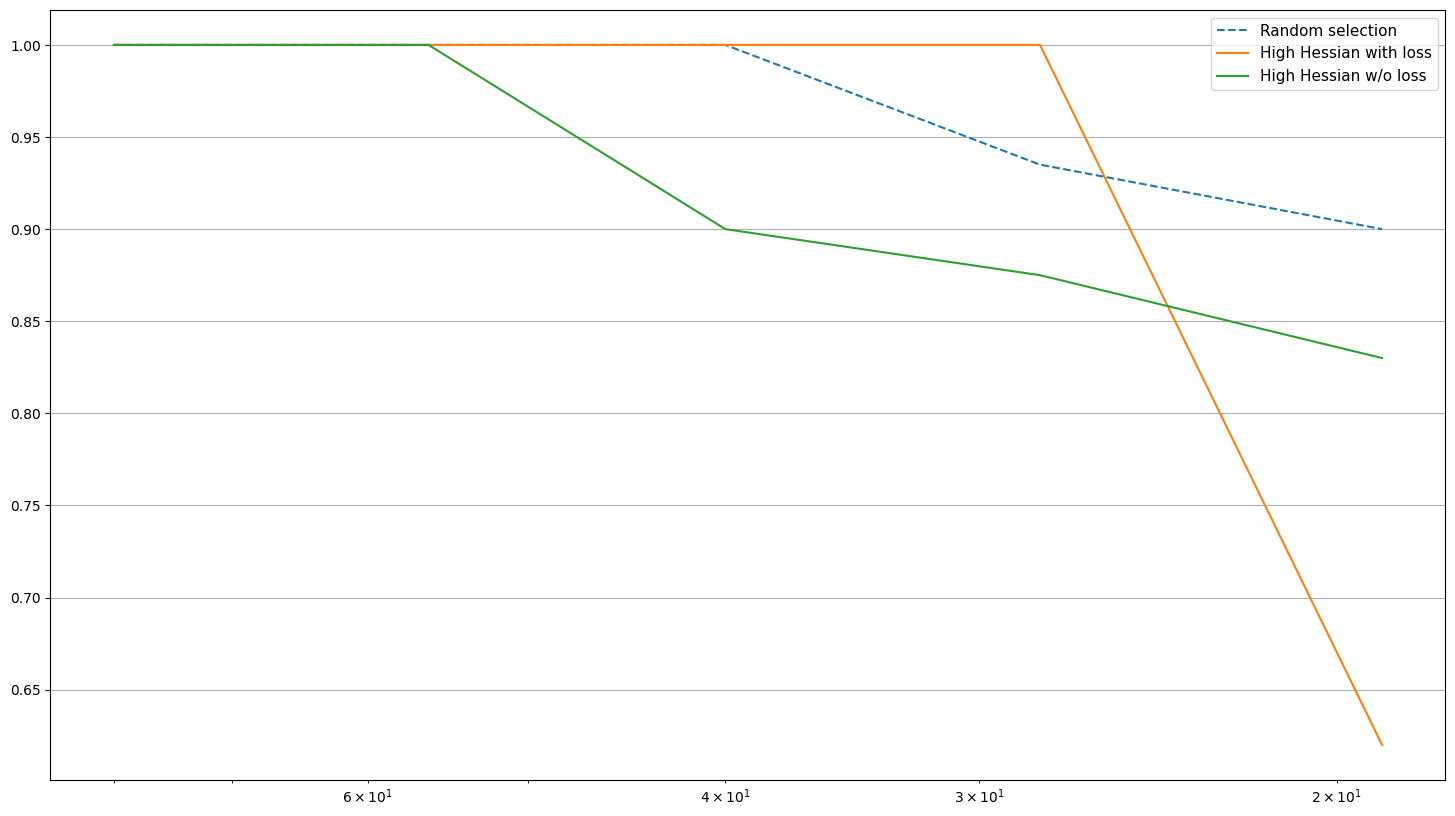

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(datasizes,np.mean(valacclist[0][0:5],axis=1),'--')
plt.plot(datasizes,np.mean(valacclist[0][5:10],axis=1))
plt.plot(datasizes,np.mean(valacclist[0][10:],axis=1))
#for curve in valacclist[1:]:
#  plt.plot(datasizes,curve)
plt.legend(namelist,fontsize =11)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.grid()
plt.show()

#-----------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
#from cur import cur_decomposition
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.datasets import fashion_mnist  #
from keras.datasets import cifar10  #
from keras.models import Sequential, Model  # Model type to be used
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, Conv1D, LocallyConnected1D, Reshape, Softmax, Input
#from keras.utils import np_utils
import tensorflow as tf
import tensorflow.keras.backend as kb
from datetime import datetime
from tqdm.notebook import tqdm

In [3]:
@tf.function
def get_hessian1(model,input,target, lossfunc = tf.keras.losses.CategoricalCrossentropy()):
    loss = lossfunc(model(input),target)
    return tf.hessians(loss, input)

In [4]:
@tf.function
def get_hessian2(model,input,target, lossfunc = tf.keras.losses.CategoricalCrossentropy()):
    with tf.GradientTape() as t2:
      t2.watch(input)
      with tf.GradientTape() as t1:
        t1.watch(input)
        loss = lossfunc(model(input),target)
      g=t1.gradient(loss,input)
    return t2.jacobian(g,input)

In [5]:
def ManifoldAngles(layerfeatlist,neighboursize1=10,classsize=10,dim_reduc_size=3,fileloc = "layers/"):

  starttime = tf.timestamp()
  tf.print("start: ")

  no_of_layers = len(layerfeatlist)
  reduction_quality = []
  class_chars = []

  for c1 in range(classsize):
    class_chars.append([])
    for layer_i in range(no_of_layers):
      class_chars[c1].append(LayerCharacteristics())
      layer_features = layerfeatlist[layer_i]

      layer_start = tf.timestamp()

      for i,x_i in enumerate(layer_features):

        class_chars[c1][layer_i].neighbour_dict[i] = tf.argsort(tf.norm( tf.math.subtract(layer_features,x_i) ,axis=1))[0:neighboursize1+1]# [1:neighboursize1+1]#templist

        W_i = tf.gather(layer_features,class_chars[c1][0].neighbour_dict[i])
        #class_chars[c1][layer_i].distances[i] = tf.math.reduce_euclidean_norm( tf.math.subtract( W_i , x_i ),axis=1)

        W_i = ( W_i - tf.math.reduce_mean(W_i,axis=0) )
        s, u, v = tf.linalg.svd( W_i )
        W_i_reduced = v[:,:dim_reduc_size]

        class_chars[c1][layer_i].svd_weights[i] = s[:dim_reduc_size]
        reduction_quality.append(  tf.reduce_sum( (s[:dim_reduc_size])/ tf.reduce_sum(s) ) )
        #tf.print("Reduction quality: ",  reduction_quality[-1])
        #if reduction_quality[-1] < 0.9: tf.print("Warning! Reduction quality: ",  reduction_quality[-1], i)
        class_chars[c1][layer_i].U_dict[i] = W_i_reduced

      tf.print("--layer time: ", tf.timestamp() - layer_start)
      class_chars[c1][layer_i].space_linearity_sum = 0.0
      angle_start = tf.timestamp()

      manifold_neighbour_angle_sum=[]
      for i in range(len(class_chars[c1][layer_i].U_dict)):
        manifold_neighbour_angle_sum_temp=[]
        manifold_neighbour_angle_sum.append([])

        for j in class_chars[c1][0].neighbour_dict[i]:
          if i != j:
            teta =  tf.matmul(  tf.transpose(class_chars[c1][layer_i].U_dict[i]),  class_chars[c1][layer_i].U_dict[int(j)]   )
            weights =  tf.matmul(  tf.transpose( tf.expand_dims(class_chars[c1][layer_i].svd_weights[i],0)), tf.expand_dims(class_chars[c1][layer_i].svd_weights[int(j)],0)  )
            Q = teta*weights
            #tf.print(i,"-----", j)
            #Q =  tf.matmul(  tf.transpose( tf.matmul( class_chars[c1][layer_i].U_dict[i], np.diag(class_chars[c1][layer_i].svd_weights[i]) ) ), tf.matmul( class_chars[c1][layer_i].U_dict[int(j)], np.diag(class_chars[c1][layer_i].svd_weights[int(j)]) ) )

            s, u, v = tf.linalg.svd( Q )

            tetaw = tf.reduce_sum(s)/tf.linalg.trace(weights)
            angles = tf.math.acos( tf.clip_by_value(tetaw,-1,1) )
            manifold_neighbour_angle_sum_temp.append( tf.math.sin(angles)  )

        #manifold_neighbour_angle_sum[i].append(tf.reduce_mean(tf.convert_to_tensor(manifold_neighbour_angle_sum_temp)) * tf.reduce_mean(class_chars[c1][layer_i].distances[i]) )
        manifold_neighbour_angle_sum[i].append(tf.reduce_mean(tf.convert_to_tensor(manifold_neighbour_angle_sum_temp)))
      #class_chars[c1][layer_i].space_linearity_sum = tf.reduce_sum( tf.convert_to_tensor(manifold_neighbour_angle_sum )) / tf.reduce_sum([tf.reduce_mean( x ) for x in list(class_chars[c1][layer_i].distances.values())])
      class_chars[c1][layer_i].space_linearity_sum = tf.reduce_mean( tf.convert_to_tensor(manifold_neighbour_angle_sum ))
      tf.print("--angle time: ", tf.timestamp() - angle_start)

  #tf.print("endtime: ", tf.timestamp() - starttime)
  if no_of_layers==1: tf.print("Average reduction quality: ",  tf.reduce_mean(reduction_quality))
  tf.print("endtime: ", tf.timestamp() - starttime)
  return class_chars,manifold_neighbour_angle_sum

In [6]:
def CurvatureByProjection(layer_features,neighboursize=3,projectdim=2):

  neighbour_dict = {}
  distances_dict = {}
  height_dict = {}
  curvature_list = []
  for i,x_i in enumerate(layer_features):
      neighbour_dict[i] = np.argsort(np.linalg.norm( np.subtract(layer_features,x_i) ,axis=1))[1:neighboursize+1]# [1:neighboursize1+1]#templist
      distances_dict[i] = np.linalg.norm(layer_features[neighbour_dict[i]]-layer_features[i],axis=1)
      #print(distances)
      basepoint = layer_features[i] - layer_features[neighbour_dict[i]][0]
      #print(basepoint)
      vectors = (layer_features[neighbour_dict[i]]-layer_features[neighbour_dict[i]][0])[1:]
      #print(vectors)
      orthbase = (sp.linalg.orth(vectors.T).T)[:projectdim]
      #print(orthbase)
      baseorth = np.dot(orthbase,basepoint)[None,:]
      #print(baseorth)

      reducvect = np.multiply(orthbase,baseorth.T)
      #print(reducvect)

      height_dict[i] = basepoint - np.sum(reducvect,axis=0)
      #print(height)
      #print(np.linalg.norm(height))
      #print(np.linalg.norm(height)*neighboursize1/np.sum(distances))
      curvature_list.append(  np.sum(1/distances_dict[i])*np.linalg.norm(height_dict[i])/neighboursize )
      #curvature_list.append(  np.linalg.norm(height_dict[i])*neighboursize/np.sum(distances_dict[i]) )  # sum 1/distances_dict[i]

  return curvature_list


In [7]:
class LayerCharacteristics():
    def __init__(self):
      self.space_linearity_sum = []
      self.total_sum = []
      self.svd_weights = {}
      self.distances = {}
      self.neighbour_dict = {}
      self.U_dict = {}

In [8]:
@tf.function
def compute_hes(model,input,target, lossfunc = tf.keras.losses.CategoricalCrossentropy()):
  loss = lossfunc(model(input),target)
  hes = tf.hessians(loss, input)
  return  hes

In [1]:
'''ResNet in PyTorch.

For Pre-activation ResNet, see 'preact_resnet.py'.

Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import numpy as np

import torchvision
import torchvision.transforms as transforms

In [2]:
import os
import argparse

In [3]:
#parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
#parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
#parser.add_argument('--resume', '-r', action='store_true',help='resume from checkpoint')
#args = parser.parse_args()

device = 'cuda'# if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10( root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(  trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(  root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(  testset, batch_size=100, shuffle=False, num_workers=2)

trainset_nocrop_noflip = torchvision.datasets.CIFAR10(  root='./data', train=True, download=True, transform=transform_test)
trainloader_forHessian  = torch.utils.data.DataLoader( trainset_nocrop_noflip, batch_size=1, shuffle=False, num_workers=2)

trainloader_RandomReduced = torch.utils.data.DataLoader( trainset, batch_size=128,sampler=np.random.choice(np.arange(0,50000),45000,replace=False), num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')



==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [13]:
pip install pyhessian

In [14]:
import pyhessian

In [15]:
from pyhessian import hessian

In [ ]:
inputs, classes = next(iter(trainloader_forHessian))
print(inputs)
print(classes)

In [ ]:
for inputs, classes in tqdm(trainloader_forHessian):
  #print(inputs)
  print(classes)

In [16]:
from time import time

In [17]:
def f(x):
  return criterion(net(x), TARGET)

0it [00:00, ?it/s]

pyhessian :  [14.722164154052734, 0.5390530824661255, 0.34428125619888306] time :  4.378427982330322  seconds 
torch hessian :  0.2587811 time :  55.20165705680847  seconds 
0 tensor([6]) [14.722164154052734, 0.5390530824661255, 0.34428125619888306] 14.73605188603655
pyhessian :  [0.0044943601824343204, 0.000988574349321425, 0.0008970653871074319] time :  1.9667425155639648  seconds 
torch hessian :  3.0611976e-05 time :  59.04853272438049  seconds 
1 tensor([9]) [0.0044943601824343204, 0.000988574349321425, 0.0008970653871074319] 0.004688419670030995
pyhessian :  [15.840461730957031, 0.4147685170173645, 0.28676632046699524] time :  7.1540186405181885  seconds 
torch hessian :  0.7061552 time :  65.27152276039124  seconds 
2 tensor([9]) [15.840461730957031, 0.4147685170173645, 0.28676632046699524] 15.848485596269986
pyhessian :  [0.2661682367324829, 0.050487931817770004, 0.01927495375275612] time :  2.518794298171997  seconds 
torch hessian :  0.0073150443 time :  54.15145206451416  se

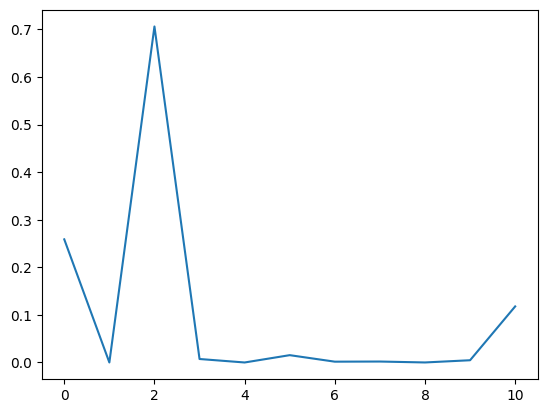

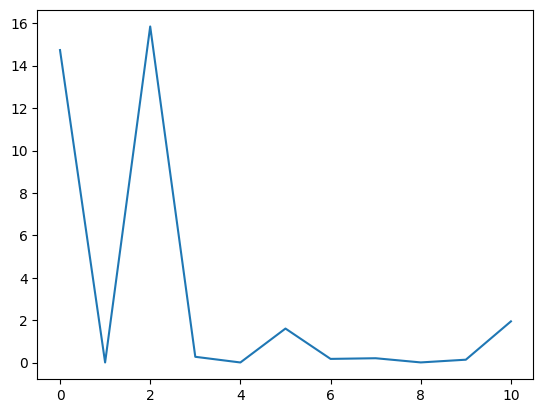

In [ ]:
HessianNormList = []
TargetList = []
idx_list = []
HessianNormList_Functional = []
HessianEigNormList = []
for i, (inputs, labels) in tqdm(enumerate(trainloader_forHessian)):
  idx_list.append(i)
  TargetList.append(labels)
  start = time()
  hessian_comp = pyhessian.hessian(net, criterion, data=(inputs, labels))
  top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=3)
  print("pyhessian : " , top_eigenvalues  , "time : ", (time() - start)         , " seconds "  )
  HessianNormList.append( top_eigenvalues )
  HessianEigNormList.append(np.linalg.norm(top_eigenvalues))

  inputs, targets = inputs.to(device), labels.to(device)
  TARGET = targets
  start = time()
  H = torch.autograd.functional.hessian(f, inputs) #, vectorize=True, outer_jacobian_strategy='forward-mode'
  print("torch hessian : " , torch.linalg.norm(H).to('cpu').detach().numpy()  , "time : ", (time() - start)         , " seconds "  )
  HessianNormList_Functional.append( torch.linalg.norm(H).to('cpu').detach().numpy() )
  #print( torch.linalg.norm(H).to('cpu').detach().numpy() )
  print(idx_list[-1], TargetList[-1], HessianNormList[-1], np.linalg.norm(HessianNormList[-1]))
  if i == 10:
    break
plt.plot(HessianNormList_Functional)
plt.show()
plt.plot(HessianEigNormList)
plt.show()

In [ ]:
smpls = np.random.choice(np.arange(0,50000),10,replace=False)

In [ ]:
trainloader_forHessian  = torch.utils.data.DataLoader( trainset_nocrop_noflip, batch_size=1,sampler= smpls , num_workers=2)

In [ ]:
start = time()
#hessian_comp = pyhessian.hessian(net, criterion, data=(inputs, labels))
hessian_comp = pyhessian.hessian(net, criterion, dataloader=trainloader_forHessian)
top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=1)
print("pyhessian : " , top_eigenvalues  , "time : ", (time() - start)         , " seconds "  )

pyhessian :  [93.614501953125] time :  11.965358018875122  seconds 


In [ ]:
top_eigenvalues

[93.614501953125]

In [ ]:
top_eigenvalues

[35.1174430847168]

In [ ]:
HessianNormList = []
TargetList = []
idx_list = []
for i, (inputs, labels) in tqdm(enumerate(trainloader_forHessian)):
  idx_list.append(i)
  TargetList.append(labels)
  start = time()
  hessian_comp = pyhessian.hessian(net, criterion, data=(inputs, labels))
  top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=1)
  print("pyhessian : " , top_eigenvalues  , "time : ", (time() - start)         , " seconds "  )
  HessianNormList.append( top_eigenvalues )

0it [00:00, ?it/s]

pyhessian :  [0.012456001713871956] time :  0.5836317539215088  seconds 
pyhessian :  [0.06454545259475708] time :  6.11785888671875  seconds 
pyhessian :  [166.1799774169922] time :  0.3932480812072754  seconds 
pyhessian :  [0.8835150599479675] time :  0.3804035186767578  seconds 
pyhessian :  [1.2175947427749634] time :  0.39772534370422363  seconds 
pyhessian :  [365.91485595703125] time :  0.368192195892334  seconds 
pyhessian :  [0.04879837855696678] time :  0.3953986167907715  seconds 
pyhessian :  [401.48724365234375] time :  0.36710119247436523  seconds 
pyhessian :  [929.1755981445312] time :  0.35259222984313965  seconds 
pyhessian :  [0.0031494267750531435] time :  0.39861035346984863  seconds 


In [3]:
device='cuda'

In [4]:
# Model
print('==> Building model..')
# net = VGG('VGG19')
net = ResNet34()
# net = PreActResNet18()
# net = GoogLeNet()
# net = DenseNet121()
# net = ResNeXt29_2x64d()
# net = MobileNet()
# net = MobileNetV2()
# net = DPN92()
# net = ShuffleNetG2()
# net = SENet18()
# net = ShuffleNetV2(1)
# net = EfficientNetB0()
# net = RegNetX_200MF()
# net = SimpleDLA()
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True


==> Building model..


In [19]:
from torchsummary import summary

In [ ]:
summary(net,(3,32,32))

In [19]:
print('==> Resuming from checkpoint..')
#assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
checkpoint = torch.load('./ckpt_100ep 1.pth')
net.load_state_dict(checkpoint['net'])
best_acc = checkpoint['acc']
start_epoch = checkpoint['epoch']

==> Resuming from checkpoint..


In [ ]:
#pip install pytorch-ignite

In [ ]:
#from ignite.engine import Engine, Events
#from ignite.handlers import create_lr_scheduler_with_warmup

In [7]:
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=1e-4)
scheduler1  = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.0001, end_factor=1.0, total_iters=2500)
#scheduler = create_lr_scheduler_with_warmup(torch_lr_scheduler, warmup_start_value=0.0,  warmup_end_value=0.1,   warmup_duration=10000)
scheduler2 = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20000)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones=[2500])


def train(epoch, dataloader = trainloader):
	print('\nEpoch: %d' % epoch)
	net.train()
	train_loss = 0
	correct = 0
	total = 0
	no_of_training_steps = 0
	for batch_idx, (inputs, targets) in enumerate(dataloader):
		print(f'batch {batch_idx} / {50000 // 128}')
		inputs, targets = inputs.to('cuda'), targets.to('cuda')
		optimizer.zero_grad()
		outputs = net(inputs)
		loss = criterion(outputs, targets)
		loss.backward()
		optimizer.step()

		train_loss += loss.item()
		_, predicted = outputs.max(1)
		total += targets.size(0)
		correct += predicted.eq(targets).sum().item()
		no_of_training_steps = no_of_training_steps + 1

		scheduler.step()
	print('train',100.*correct/total, correct, total, no_of_training_steps)
			#progress_bar(batch_idx, len(dataloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'  % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))

	return 100.*correct/total
'''

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

def train(network, epoch, batch_size=128, trainset='cifar10', testset='cifar10'):
	if trainset == 'cifar10':
		trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
	if testset == 'cifar10':
		testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

	dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
	testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
	criterion = nn.CrossEntropyLoss()
	optimizer = torch.optim.SGD(network.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)
	scheduler1  = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.0001, end_factor=1.0, total_iters=2500)
	scheduler2 = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20000)
	scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones=[2500])

	print('\nEpoch: %d' % epoch)
	network.train()
	train_loss = 0
	train_correct = 0
	train_total = 0
	no_of_training_steps = 0
	for batch_num, (inputs, targets) in enumerate(dataloader):
		print(f'batch {batch_num} / {50000 // batch_size}')
		inputs, targets = inputs.to('cuda'), targets.to('cuda')# torchify_array(inputs), torchify_array(targets, reshape=False)
		optimizer.zero_grad()
		outputs = network(inputs)
		loss = criterion(outputs, targets)
		loss.backward()
		optimizer.step()

		train_loss += loss.item()
		_, predicted = outputs.max(1)
		# _, actual = targets.max(1) # only if data is custom size
		train_total += targets.size(0)
		train_correct += predicted.eq(targets).sum().item()
		no_of_training_steps = no_of_training_steps + 1

		scheduler.step()
	print('train',100.*train_correct/train_total, train_correct, train_total, no_of_training_steps)


def test(epoch, name="ckpt"):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            #progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)' % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

    # Save checkpoint.
    acc = 100.*correct/total

    print('test',100.*correct/total, correct, total)
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/' + name + '.pth')
        best_acc = acc

    return 100.*correct/total

In [8]:
for epoch in range(10):
	train(net, epoch)

Files already downloaded and verified
Files already downloaded and verified

Epoch: 0
batch 0 / 390
batch 1 / 390
batch 2 / 390
batch 3 / 390
batch 4 / 390
batch 5 / 390
batch 6 / 390
batch 7 / 390
batch 8 / 390
batch 9 / 390
batch 10 / 390
batch 11 / 390
batch 12 / 390
batch 13 / 390
batch 14 / 390
batch 15 / 390
batch 16 / 390
batch 17 / 390
batch 18 / 390
batch 19 / 390
batch 20 / 390
batch 21 / 390
batch 22 / 390
batch 23 / 390
batch 24 / 390
batch 25 / 390
batch 26 / 390
batch 27 / 390
batch 28 / 390
batch 29 / 390
batch 30 / 390
batch 31 / 390
batch 32 / 390
batch 33 / 390
batch 34 / 390
batch 35 / 390
batch 36 / 390
batch 37 / 390
batch 38 / 390
batch 39 / 390
batch 40 / 390
batch 41 / 390
batch 42 / 390
batch 43 / 390
batch 44 / 390
batch 45 / 390
batch 46 / 390
batch 47 / 390
batch 48 / 390
batch 49 / 390
batch 50 / 390
batch 51 / 390
batch 52 / 390
batch 53 / 390
batch 54 / 390
batch 55 / 390
batch 56 / 390
batch 57 / 390
batch 58 / 390
batch 59 / 390
batch 60 / 390
batch 61 

KeyboardInterrupt: 

In [17]:
for epoch in range(50):
    trainacc_list = []
    testacc_list = []
    trainacc_list.append(train(net, epoch))
    #testacc_list.append(test(epoch))
    print(trainacc_list[-1], testacc_list[-1])

Files already downloaded and verified
Files already downloaded and verified

Epoch: 0
batch 0 / 390
batch 1 / 390
batch 2 / 390
batch 3 / 390
batch 4 / 390
batch 5 / 390
batch 6 / 390
batch 7 / 390
batch 8 / 390
batch 9 / 390
batch 10 / 390
batch 11 / 390
batch 12 / 390
batch 13 / 390
batch 14 / 390
batch 15 / 390
batch 16 / 390
batch 17 / 390
batch 18 / 390
batch 19 / 390
batch 20 / 390
batch 21 / 390
batch 22 / 390
batch 23 / 390
batch 24 / 390
batch 25 / 390
batch 26 / 390
batch 27 / 390
batch 28 / 390
batch 29 / 390
batch 30 / 390
batch 31 / 390
batch 32 / 390
batch 33 / 390
batch 34 / 390
batch 35 / 390
batch 36 / 390
batch 37 / 390
batch 38 / 390
batch 39 / 390
batch 40 / 390
batch 41 / 390
batch 42 / 390
batch 43 / 390
batch 44 / 390
batch 45 / 390
batch 46 / 390
batch 47 / 390
batch 48 / 390
batch 49 / 390
batch 50 / 390
batch 51 / 390
batch 52 / 390
batch 53 / 390
batch 54 / 390
batch 55 / 390
batch 56 / 390
batch 57 / 390
batch 58 / 390
batch 59 / 390
batch 60 / 390
batch 61 

IndexError: list index out of range

In [ ]:
for epoch in tqdm(range(50, 100)):
    trainacc_list = []
    testacc_list = []
    trainacc_list.append(train(epoch))
    testacc_list.append(test(epoch))
    print(trainacc_list[-1], testacc_list[-1])

  0%|          | 0/50 [00:00<?, ?it/s]


Epoch: 50
train 95.332 47666 50000 391
test 88.93 8893 10000
95.332 88.93

Epoch: 51
train 95.642 47821 50000 391
test 89.64 8964 10000
95.642 89.64

Epoch: 52
train 95.566 47783 50000 391
test 89.92 8992 10000
Saving..
95.566 89.92

Epoch: 53
train 95.596 47798 50000 391
test 89.74 8974 10000
95.596 89.74

Epoch: 54
train 95.62 47810 50000 391
test 90.08 9008 10000
Saving..
95.62 90.08

Epoch: 55
train 95.966 47983 50000 391
test 89.42 8942 10000
95.966 89.42

Epoch: 56
train 95.928 47964 50000 391
test 86.9 8690 10000
95.928 86.9

Epoch: 57
train 95.604 47802 50000 391
test 88.69 8869 10000
95.604 88.69

Epoch: 58
train 96.058 48029 50000 391
test 88.88 8888 10000
96.058 88.88

Epoch: 59
train 96.142 48071 50000 391
test 90.15 9015 10000
Saving..
96.142 90.15

Epoch: 60
train 96.072 48036 50000 391
test 90.52 9052 10000
Saving..
96.072 90.52

Epoch: 61
train 96.17 48085 50000 391
test 89.44 8944 10000
96.17 89.44

Epoch: 62
train 96.1 48050 50000 391
test 90.73 9073 10000
Saving..
9

In [23]:
for epoch in range(start_epoch, 250):
    trainacc_list = []
    testacc_list = []
    trainacc_list.append(train(epoch, trainloader_RandomReduced))
    testacc_list.append(test(epoch,name='RandomReduc'))
    print(trainacc_list[-1], testacc_list[-1])


Epoch: 98
train 99.46444444444444 44759 45000 352
test 94.0 9400 10000
Saving..
99.46444444444444 94.0

Epoch: 99
train 99.56444444444445 44804 45000 352
test 93.82 9382 10000
99.56444444444445 93.82

Epoch: 100
train 99.50666666666666 44778 45000 352
test 93.2 9320 10000
99.50666666666666 93.2

Epoch: 101
train 99.03333333333333 44565 45000 352
test 92.19 9219 10000
99.03333333333333 92.19

Epoch: 102
train 98.00888888888889 44104 45000 352
test 91.31 9131 10000
98.00888888888889 91.31

Epoch: 103
train 97.14888888888889 43717 45000 352
test 89.13 8913 10000
97.14888888888889 89.13

Epoch: 104
train 96.55777777777777 43451 45000 352
test 89.12 8912 10000
96.55777777777777 89.12

Epoch: 105
train 96.76 43542 45000 352
test 90.12 9012 10000
96.76 90.12

Epoch: 106
train 96.75777777777778 43541 45000 352
test 89.14 8914 10000
96.75777777777778 89.14

Epoch: 107
train 96.92444444444445 43616 45000 352
test 89.59 8959 10000
96.92444444444445 89.59

Epoch: 108
train 97.05777777777777 43676

In [ ]:
from functorch import jacrev, jacfwd
from functorch import hessian

In [26]:
testcheck = torch.load('./checkpoint/RandomReduc.pth')
testcheck['acc']

94.59